# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import re

from scipy.stats import randint

import opendatasets as od
import missingno as msno
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

## Data Acquisiton and Preprocessing

In [2]:
od.download('https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?resource=download')

Skipping, found downloaded files in ".\polycystic-ovary-syndrome-pcos" (use force=True to force download)


In [3]:
PCOS_woinf =pd.read_excel('polycystic-ovary-syndrome-pcos/\PCOS_data_without_infertility.xlsx', sheet_name="Full_new")
PCOS_inf =pd.read_csv('polycystic-ovary-syndrome-pcos/\PCOS_infertility.csv')

PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
PCOS_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [5]:
#There are two files in the file. However I did not use the second one as the first file has all the features I needed.
data = PCOS_woinf

In [6]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [7]:
#There are unnecessary spaces in column names:
data.columns = [col.strip() for col in data.columns]
data.columns = [re.sub(' +', ' ', col) for col in data.columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

Two columns in object type, although they actually contains numerical features:

In [9]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

In [10]:
data['AMH(ng/mL)'].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: float64

In [11]:
data["II beta-HCG(mIU/mL)"] = pd.to_numeric(data["II beta-HCG(mIU/mL)"], errors='coerce')

In [12]:
data['II beta-HCG(mIU/mL)'].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II beta-HCG(mIU/mL), dtype: float64

In [13]:
#Checking if there are missing values
data.isna().sum()

Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
Age (yrs)                  0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
I beta-HCG(mIU/mL)         0
II beta-HCG(mIU/mL)        1
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 1
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)  

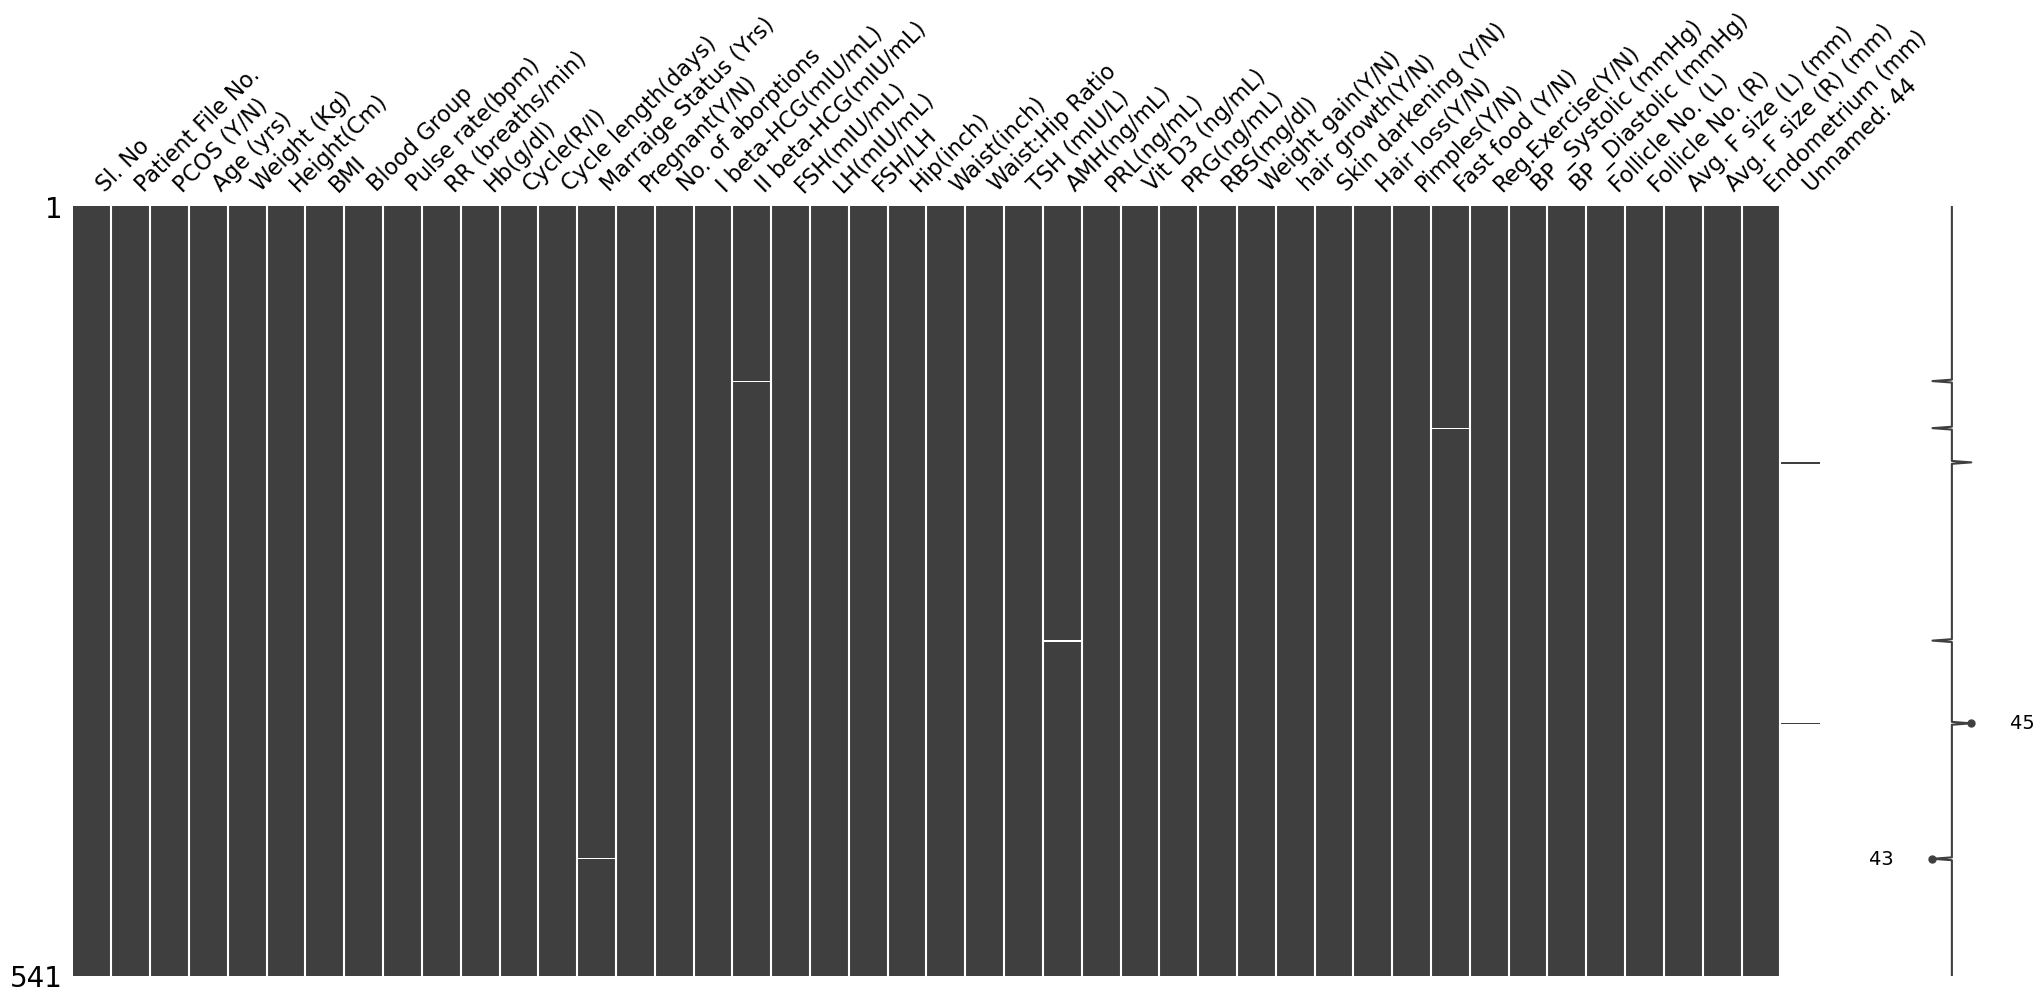

In [14]:
msno.matrix(data)
plt.show()

In [15]:
#One column is empty
data = data.drop(['Unnamed: 44'], axis = 1) 
print(data.shape)

(541, 44)


In [16]:
#Some columns have empty rows
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(),inplace=True)
data['II beta-HCG(mIU/mL)'].fillna(data['II beta-HCG(mIU/mL)'].mean(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].mean(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mean(),inplace=True)

In [17]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [18]:
#Some columns have categorical data but their type is not categorical. It causes statistics to be misleading
data['Pregnant(Y/N)'].describe()
print(data['PCOS (Y/N)'].describe())
data['PCOS (Y/N)_cat'] = data['PCOS (Y/N)'].astype('category')
assert data['PCOS (Y/N)_cat'].dtype  == 'category'
print('\n')
print(data['PCOS (Y/N)_cat'].describe())

count    541.000000
mean       0.327172
std        0.469615
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: PCOS (Y/N), dtype: float64


count     541
unique      2
top         0
freq      364
Name: PCOS (Y/N)_cat, dtype: int64


In [19]:
def to_category(col_nm):
    data[col_nm] = data[col_nm].astype('category')

to_category('Pregnant(Y/N)')
to_category('Skin darkening (Y/N)')
to_category('Hair loss(Y/N)')
to_category('Pimples(Y/N)')
to_category('Fast food (Y/N)')
to_category('Reg.Exercise(Y/N)')

In [20]:
# Checking if there are columns with high variance
print(data.var().astype('int64'))

Sl. No                      24435
Patient File No.            24435
PCOS (Y/N)                      0
Age (yrs)                      29
Weight (Kg)                   121
Height(Cm)                     36
BMI                            16
Blood Group                     3
Pulse rate(bpm)                19
RR (breaths/min)                2
Hb(g/dl)                        0
Cycle(R/I)                      0
Cycle length(days)              2
Marraige Status (Yrs)          23
No. of aborptions               0
I beta-HCG(mIU/mL)       11215269
II beta-HCG(mIU/mL)       2572153
FSH(mIU/mL)                 47098
LH(mIU/mL)                   7512
FSH/LH                       3683
Hip(inch)                      15
Waist(inch)                    12
Waist:Hip Ratio                 0
TSH (mIU/L)                    14
AMH(ng/mL)                     34
PRL(ng/mL)                    224
Vit D3 (ng/mL)             119859
PRG(ng/mL)                     14
RBS(mg/dl)                    344
Weight gain(Y/

In [21]:
#This column is unnecessary
data = data.drop(['Sl. No'], axis = 1)

https://datascience103579984.wordpress.com/2019/12/23/preprocessing-for-machine-learning-in-python-from-datacamp/2/

In [22]:
# Columns with high variance
scaler = StandardScaler()
data_subset = data[['I beta-HCG(mIU/mL)','II beta-HCG(mIU/mL)','FSH(mIU/mL)','LH(mIU/mL)','Vit D3 (ng/mL)']]
data_subset_scaled = scaler.fit_transform(data_subset)

In [23]:
data["Fast food (Y/N)"] = data["Fast food (Y/N)"].astype('int64')
data["Fast food (Y/N)"]

0      1
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: Fast food (Y/N), Length: 541, dtype: int64

In [24]:
data.describe()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Weight gain(Y/N),hair growth(Y/N),Fast food (Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,...,0.377079,0.273567,0.513863,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,...,0.485104,0.446202,0.500270,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,...,0.000000,0.000000,1.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,1.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


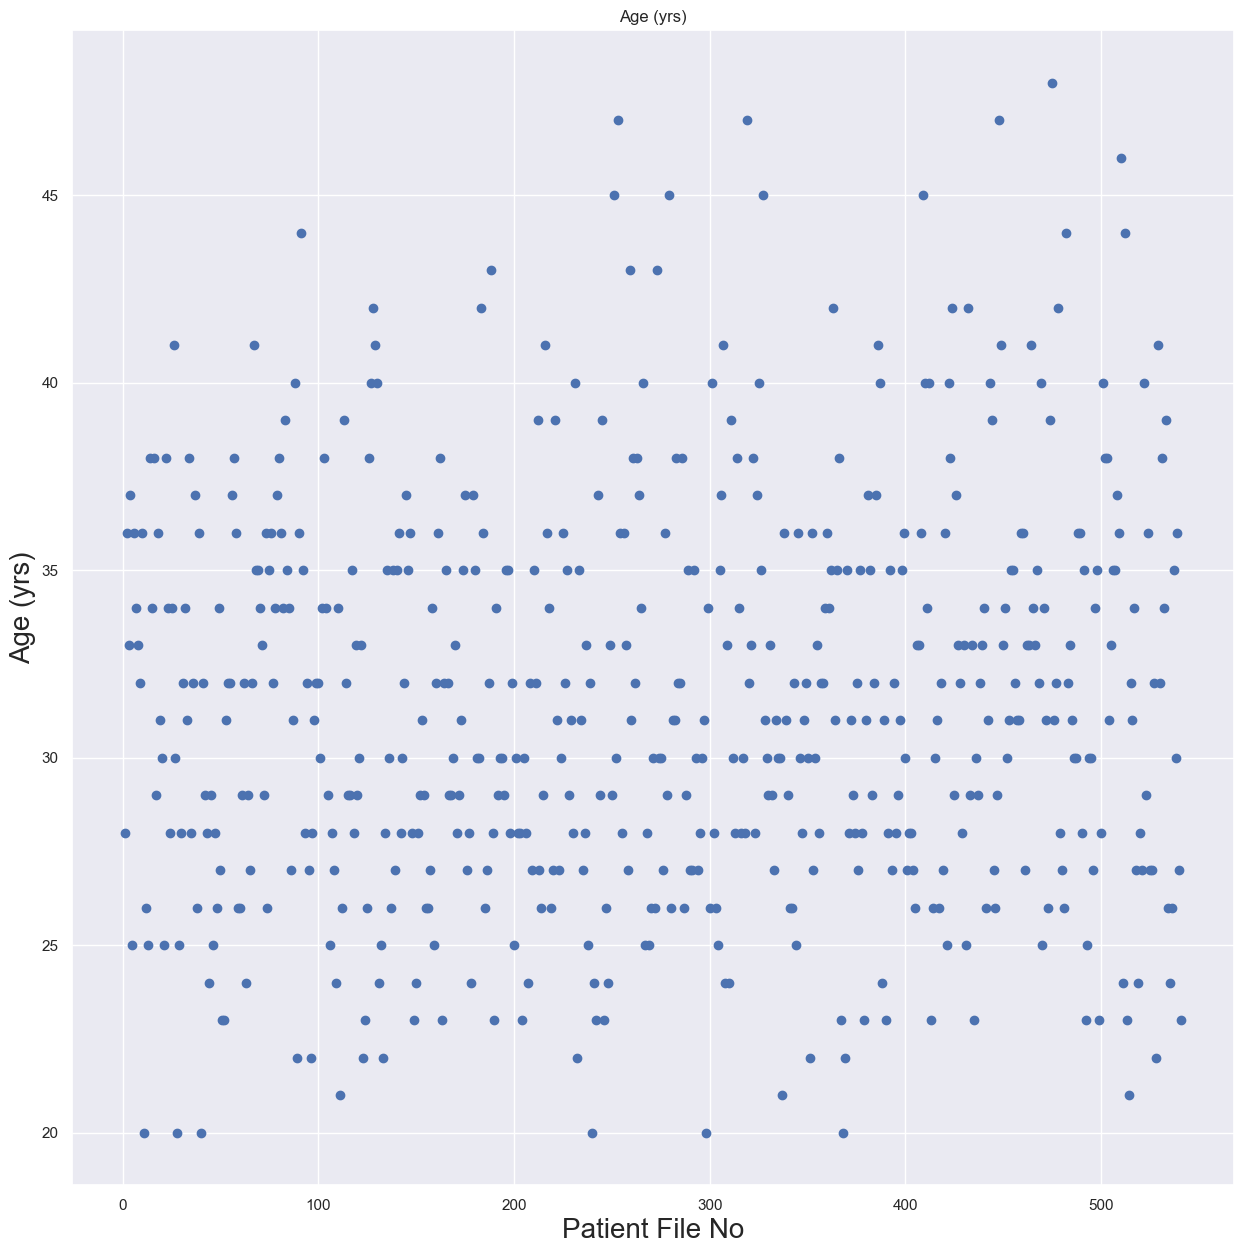

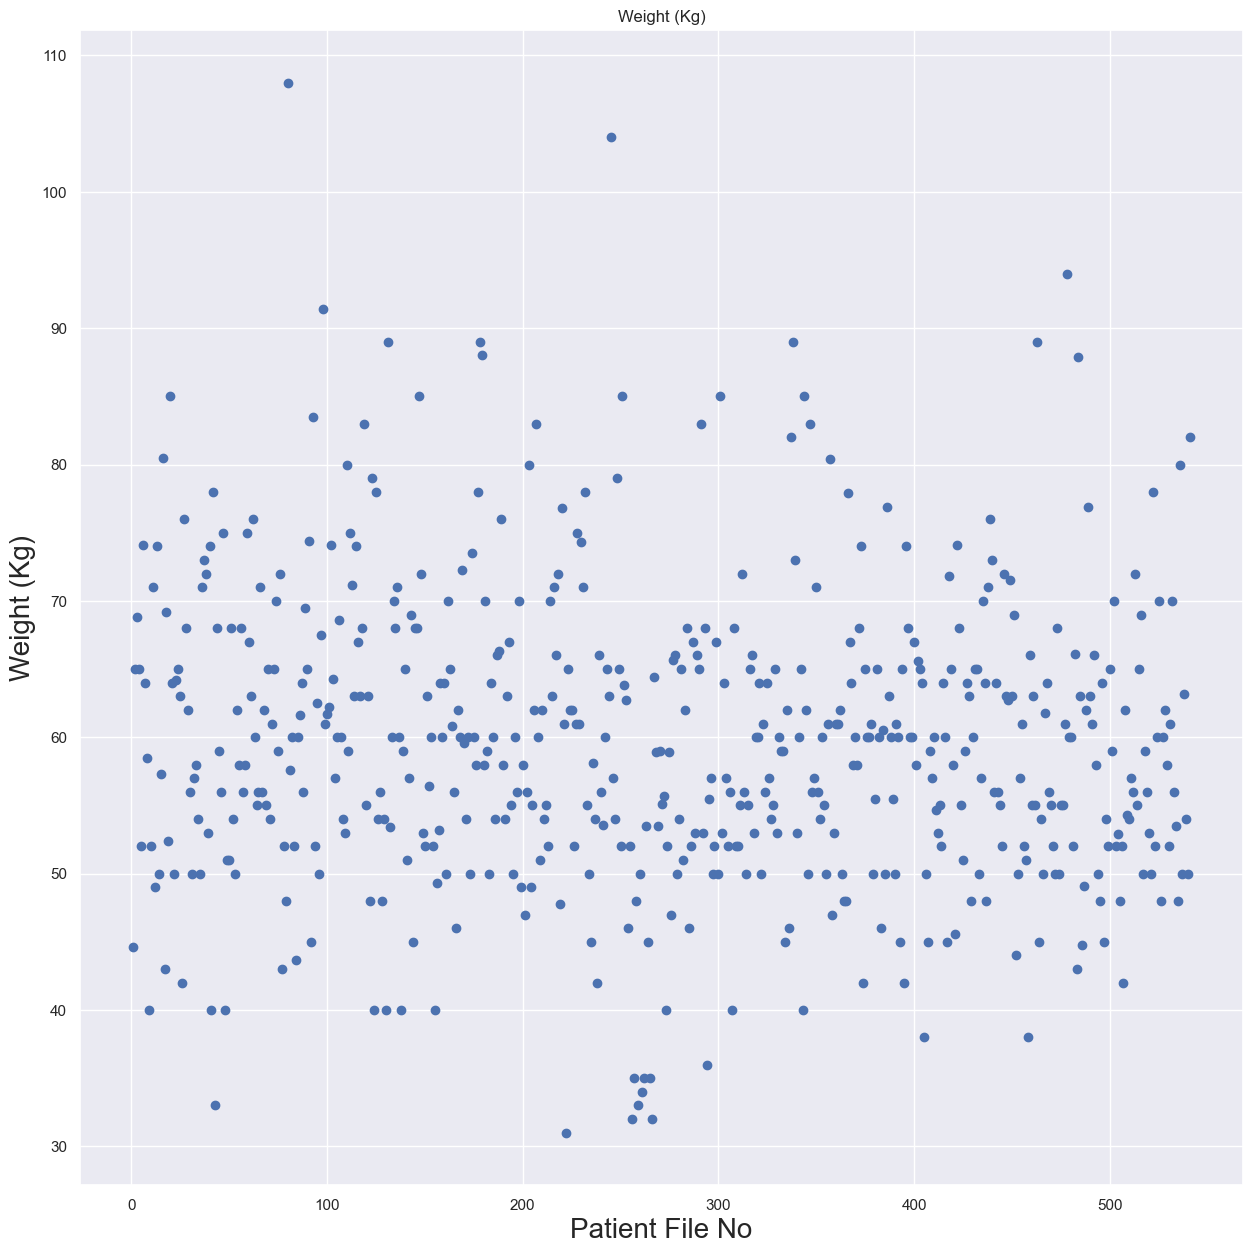

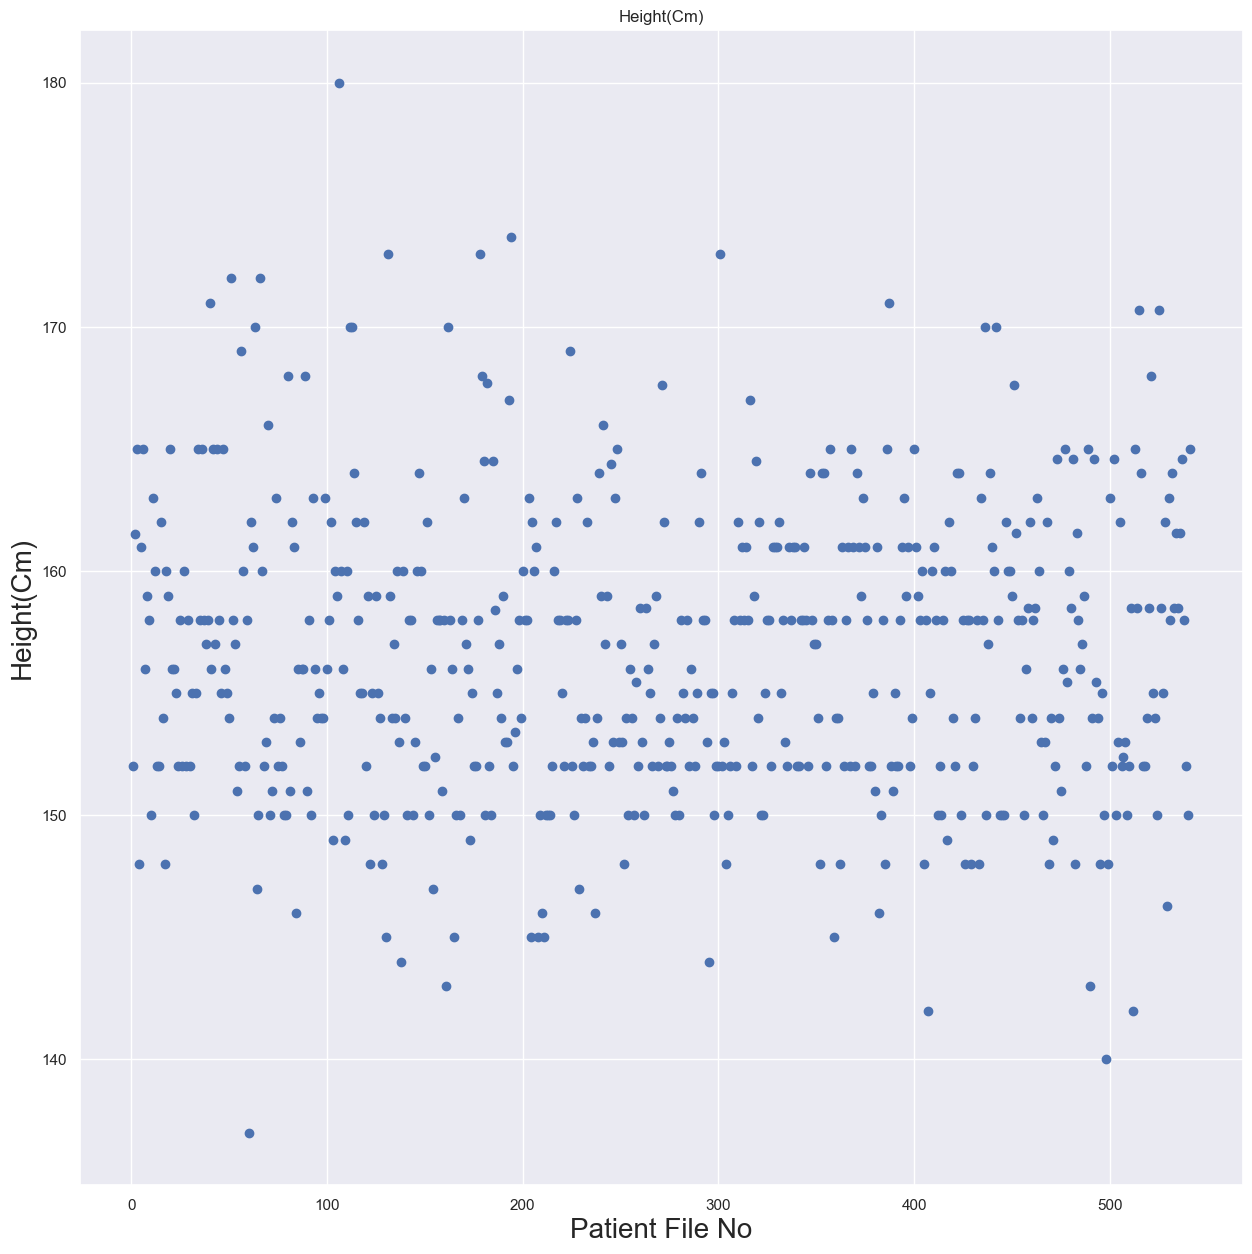

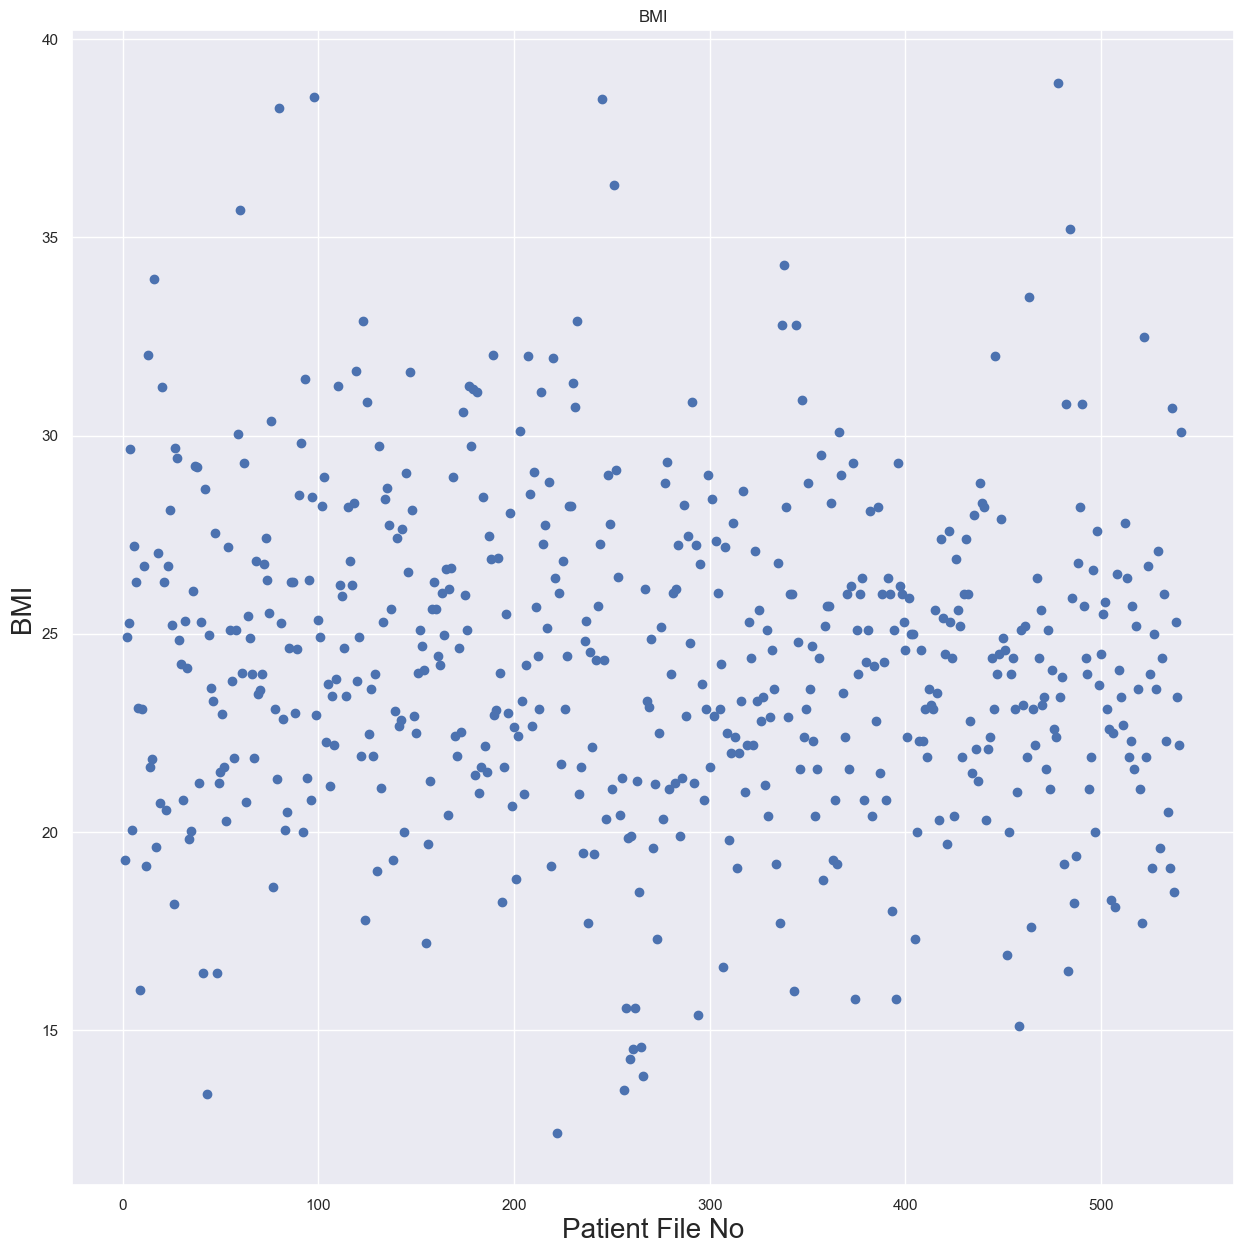

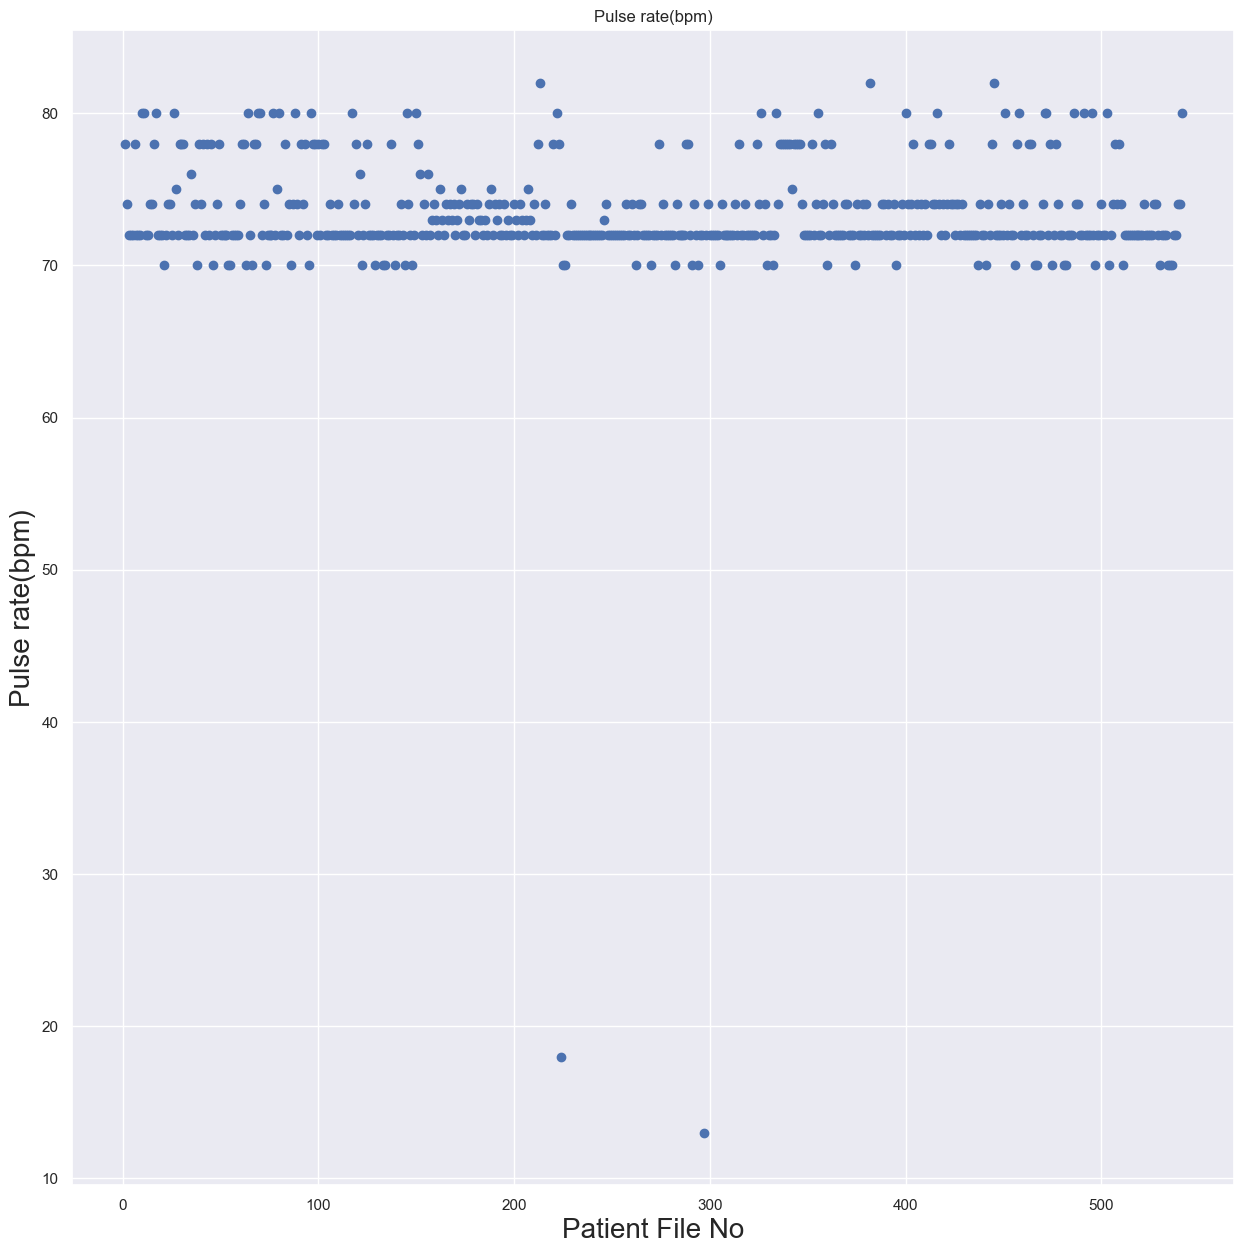

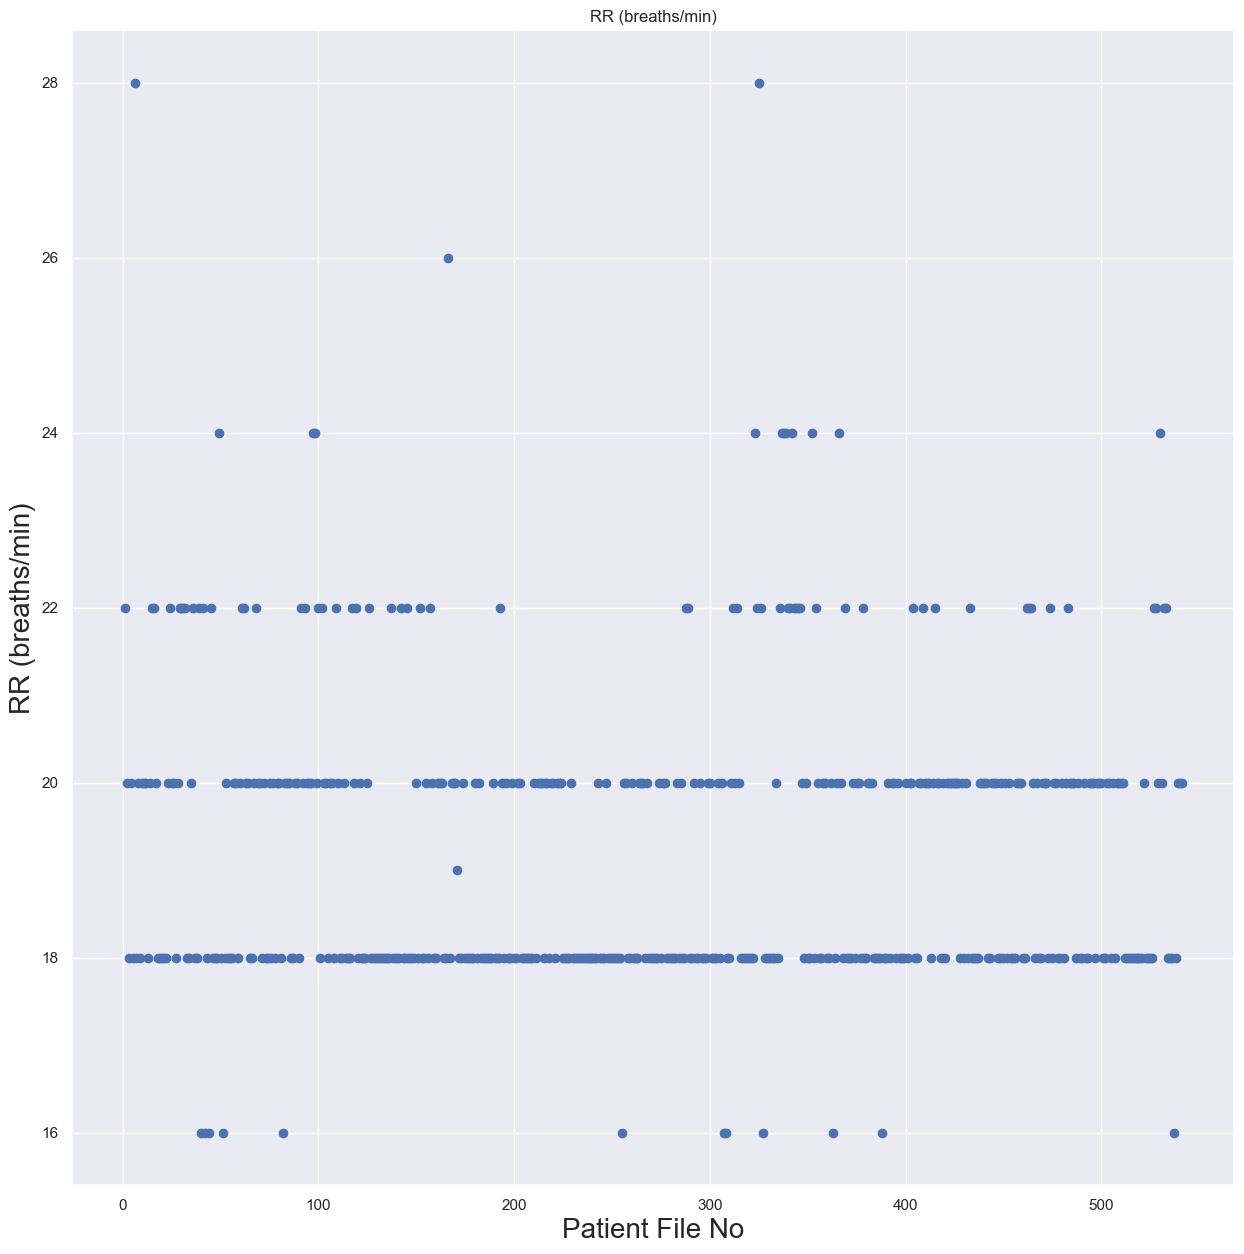

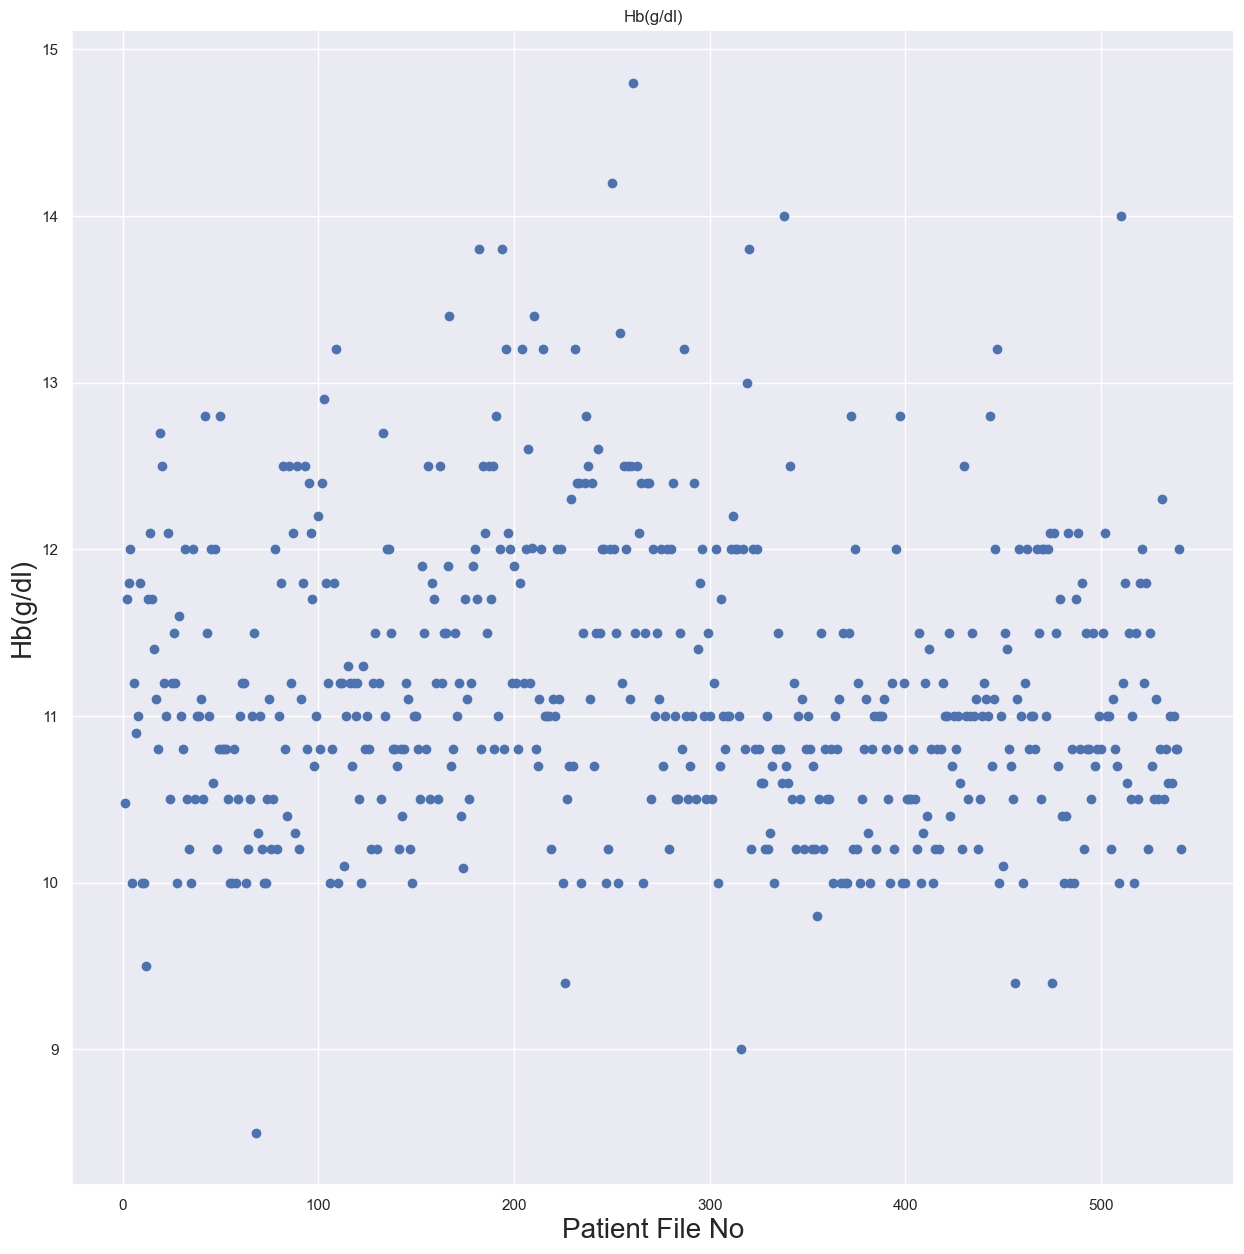

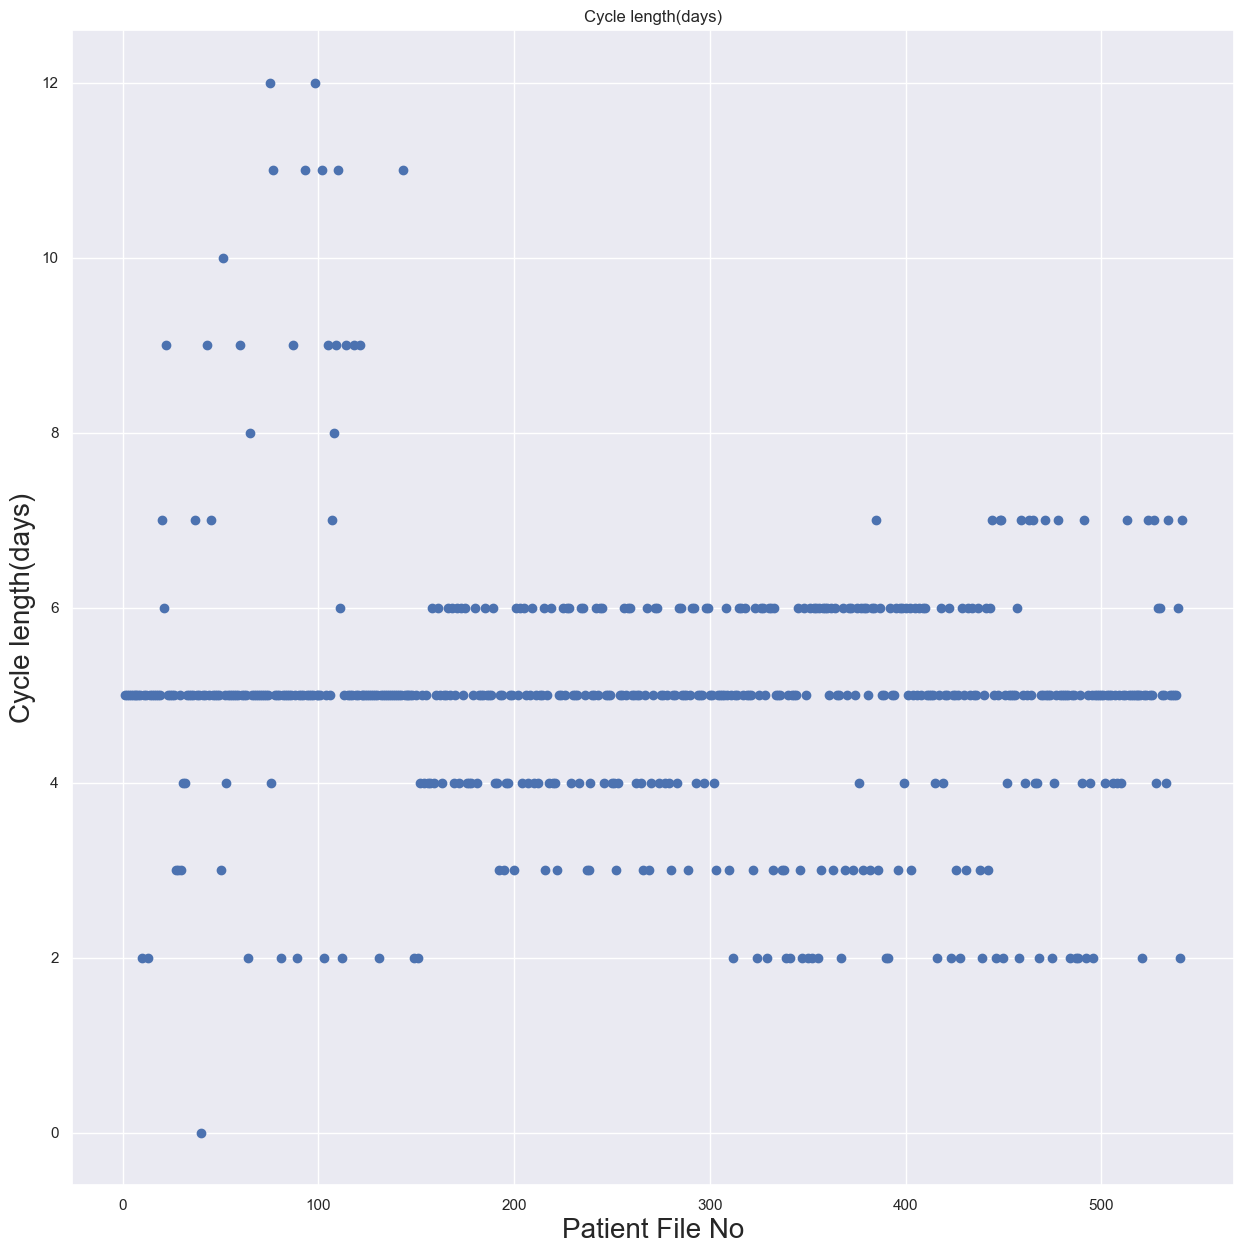

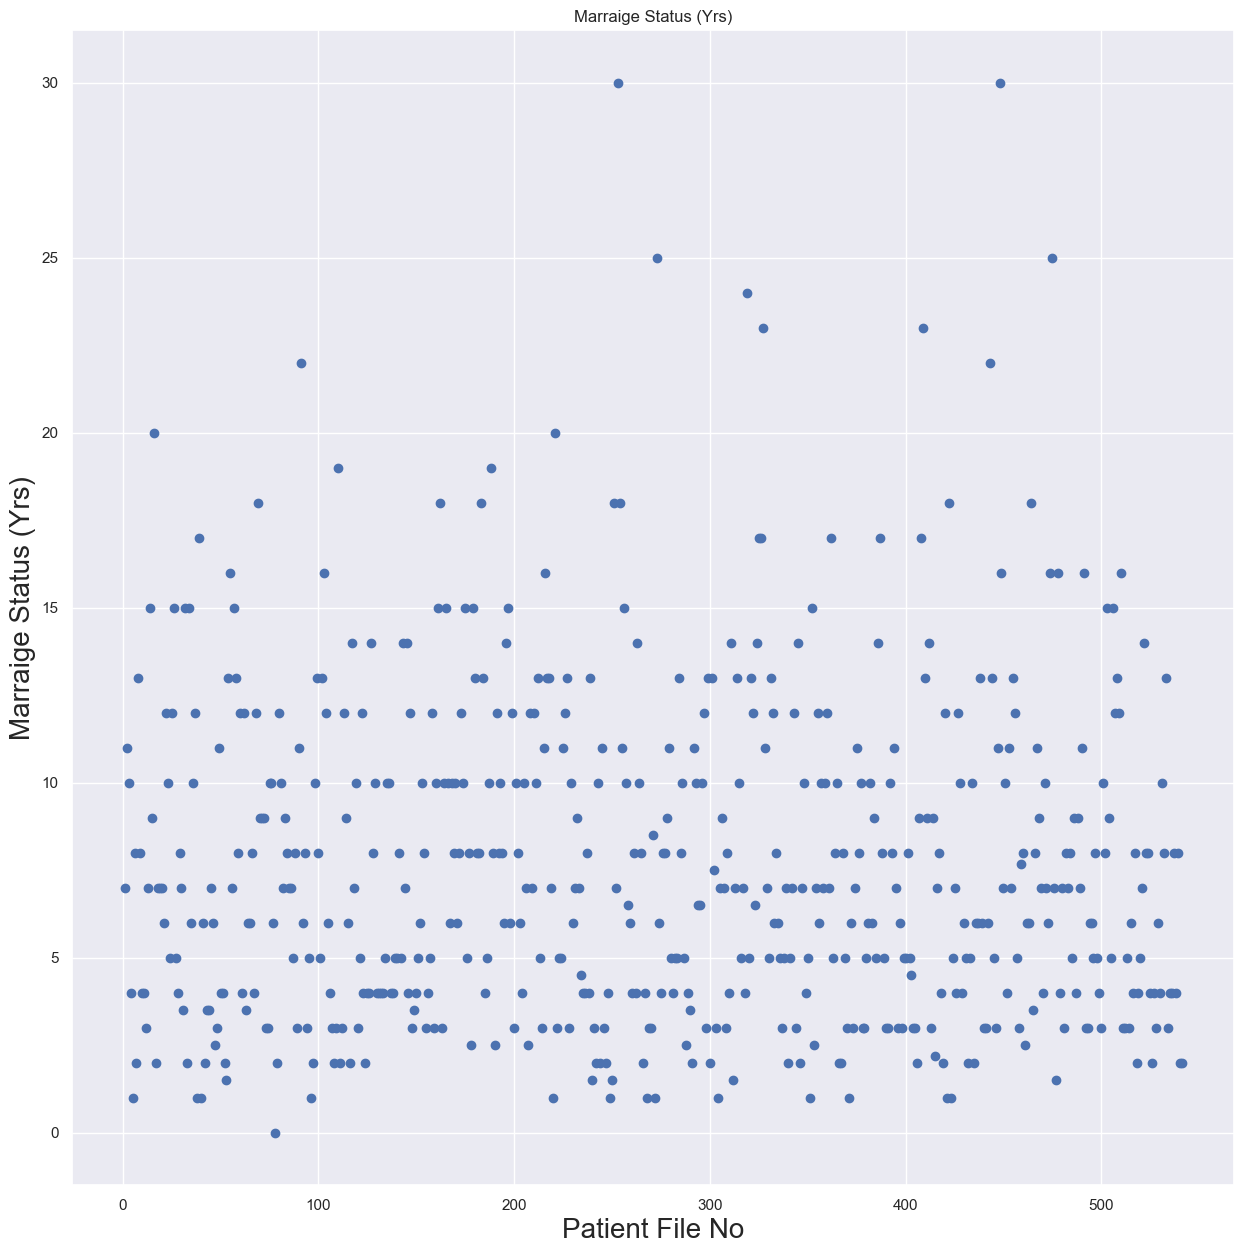

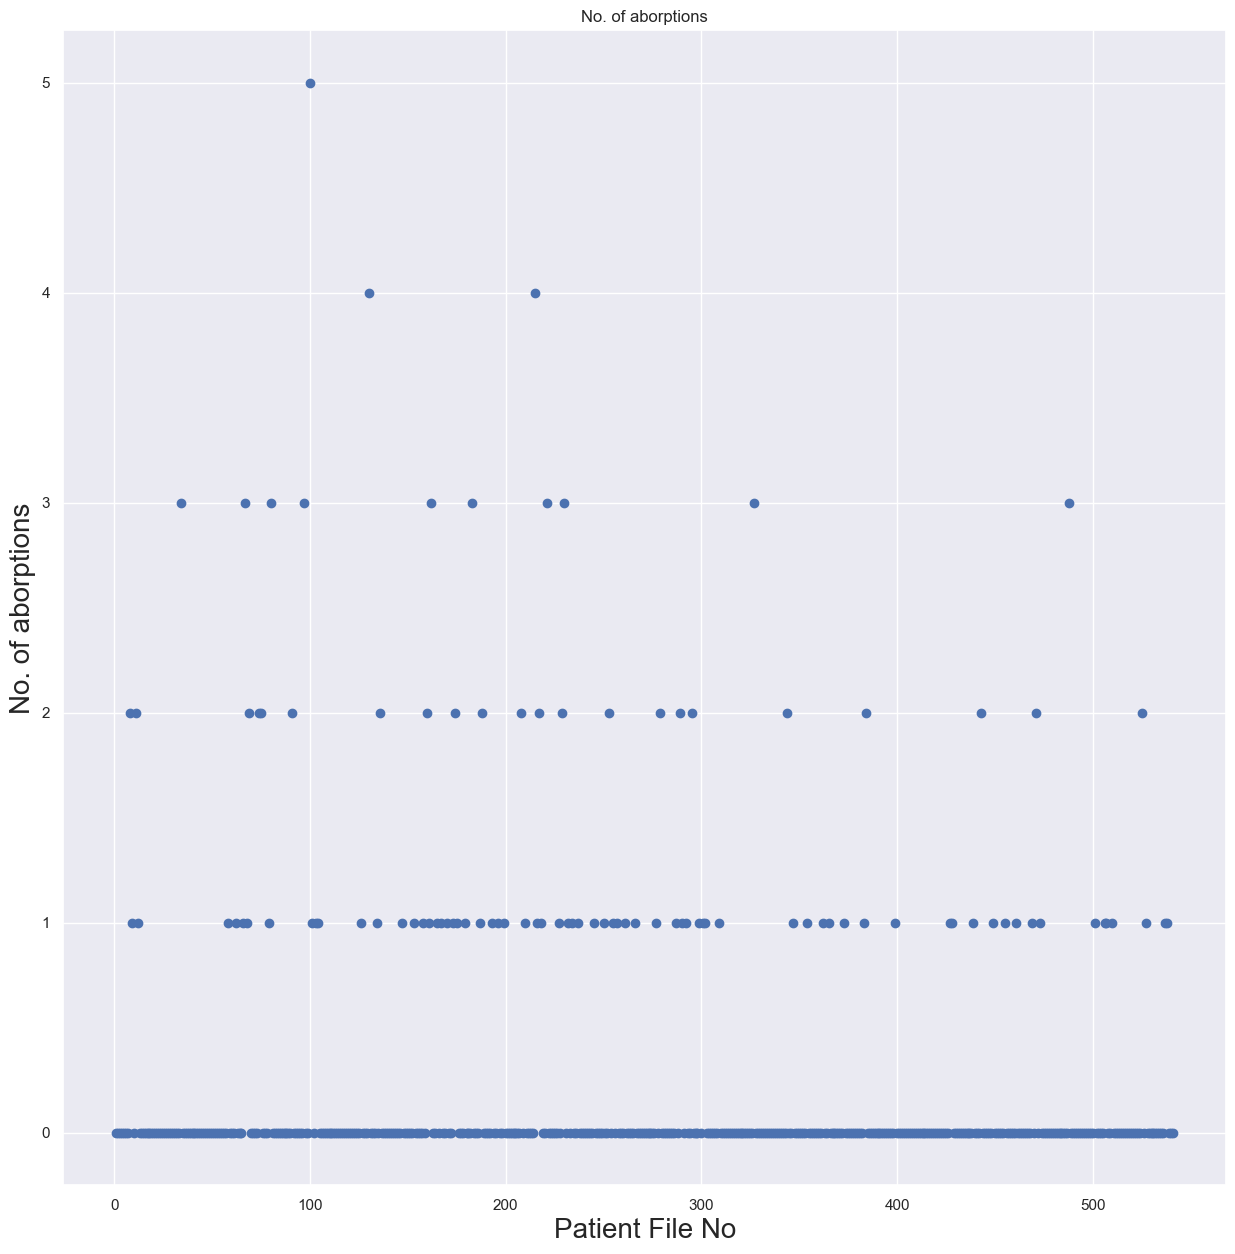

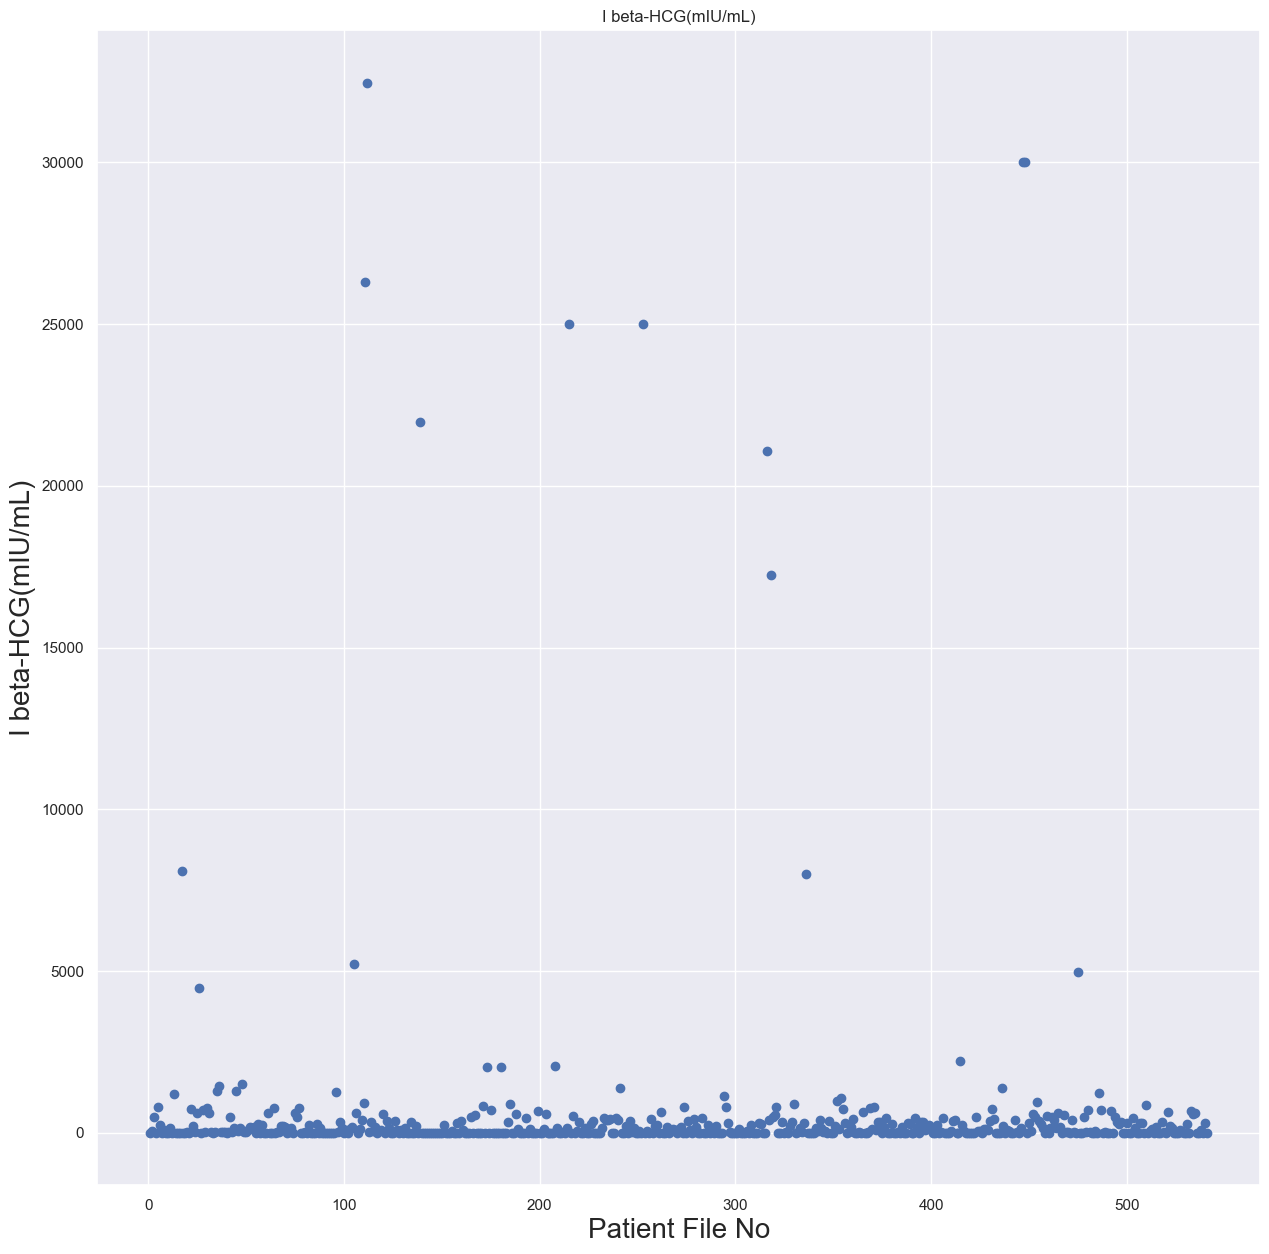

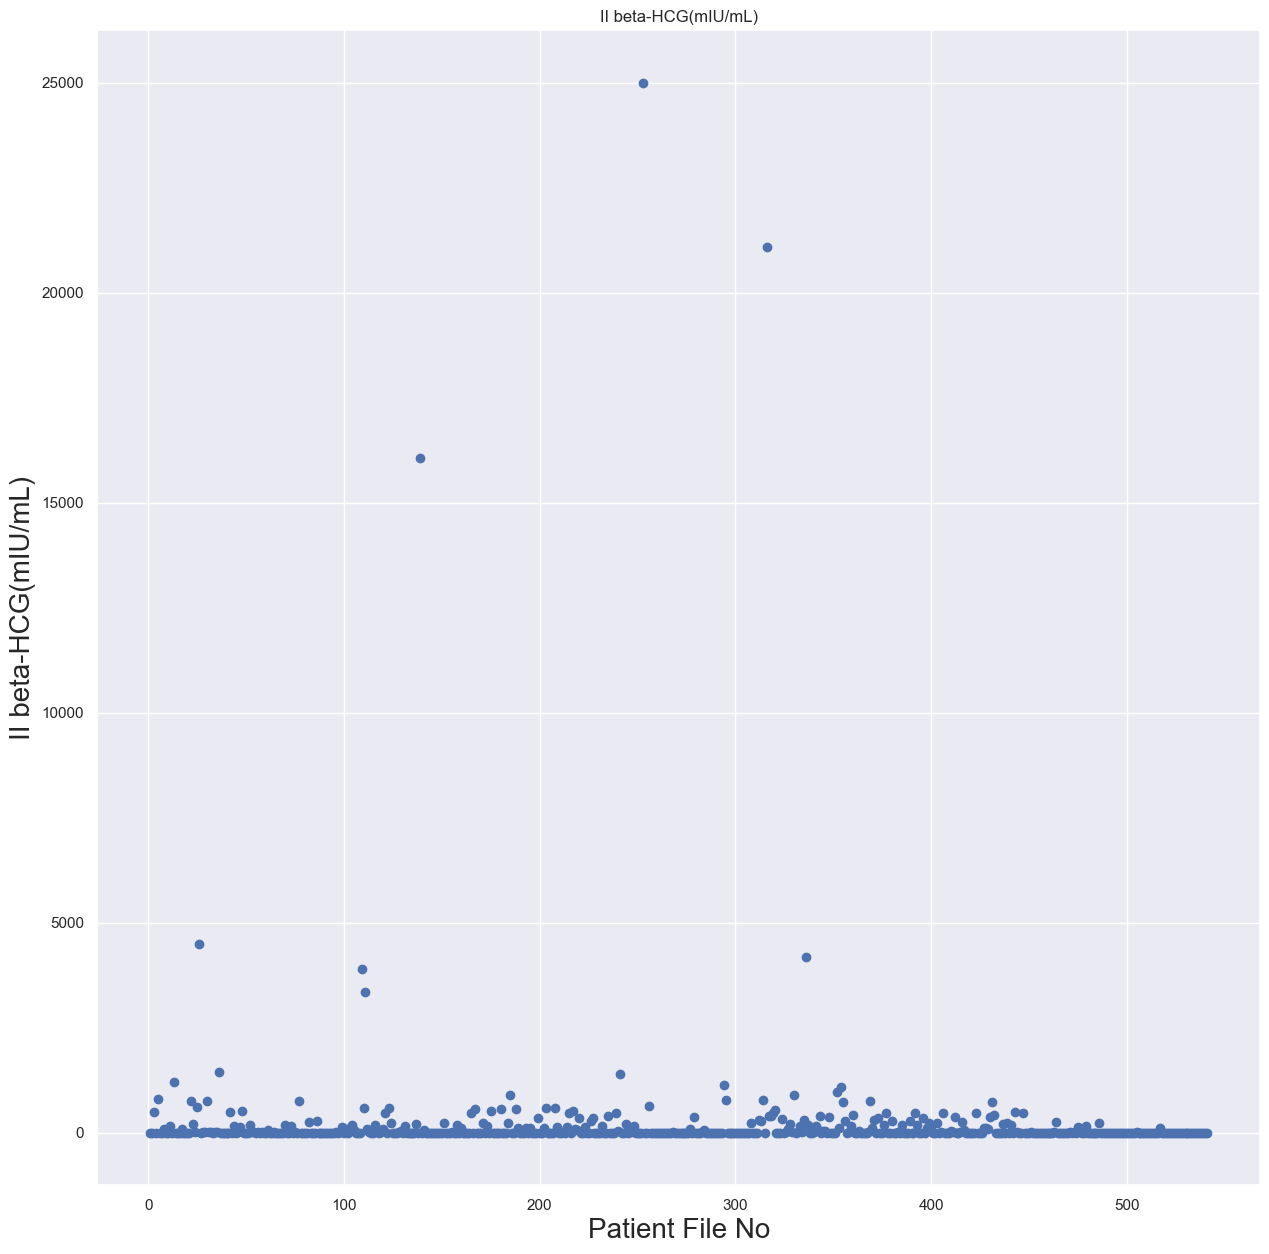

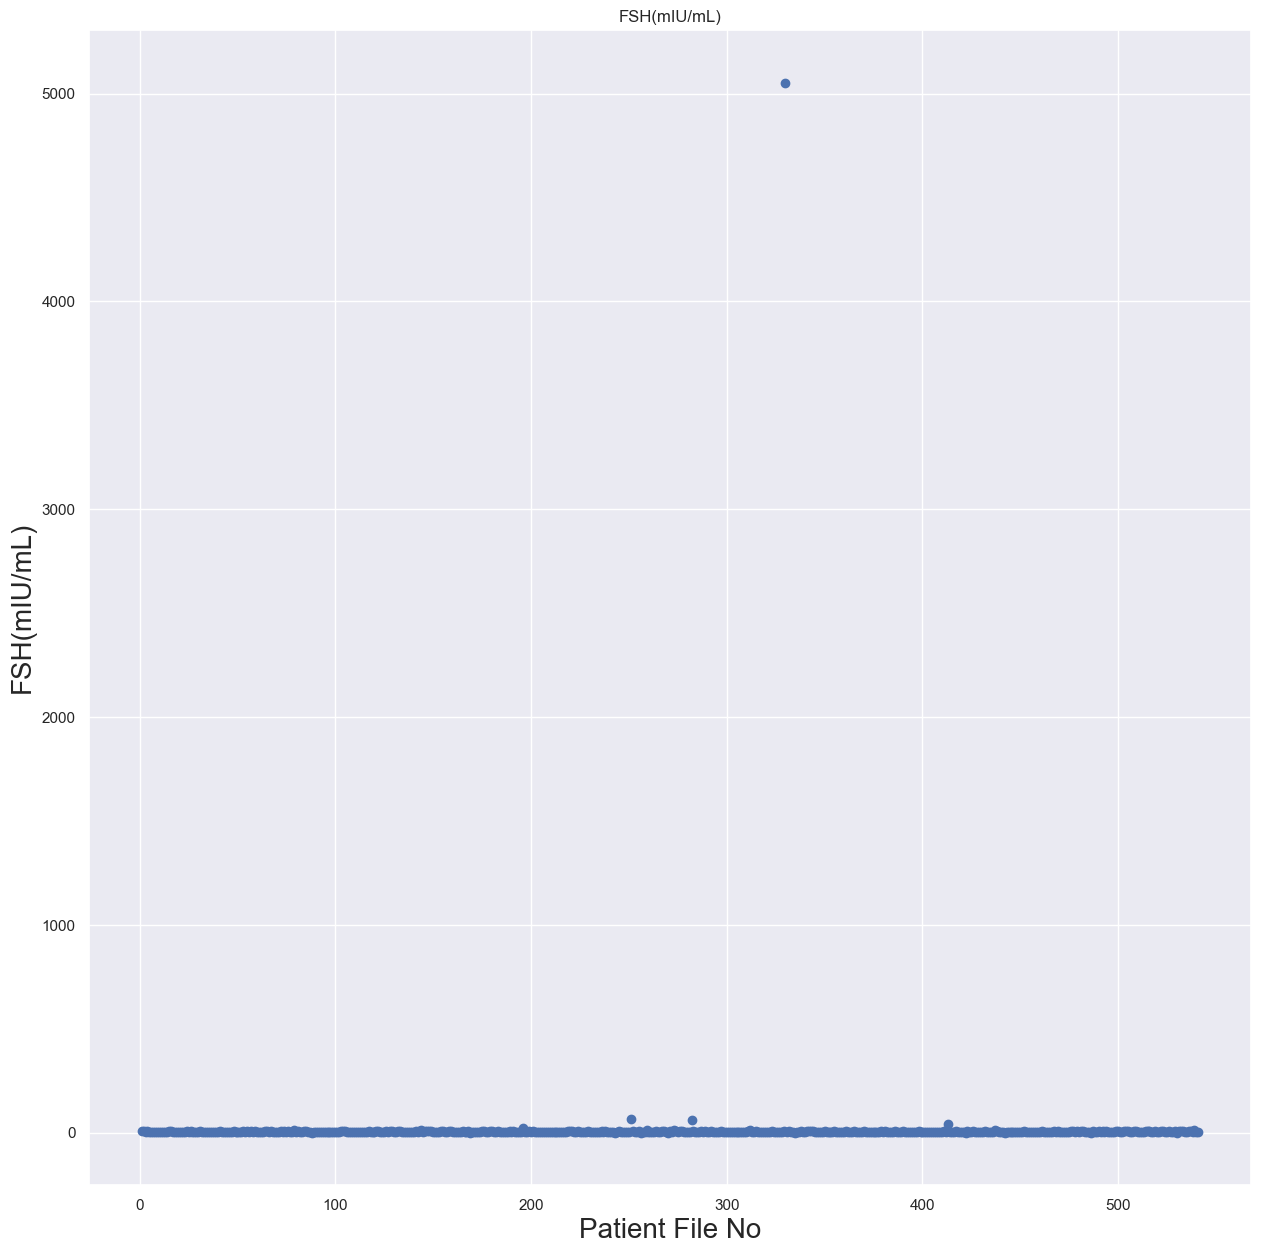

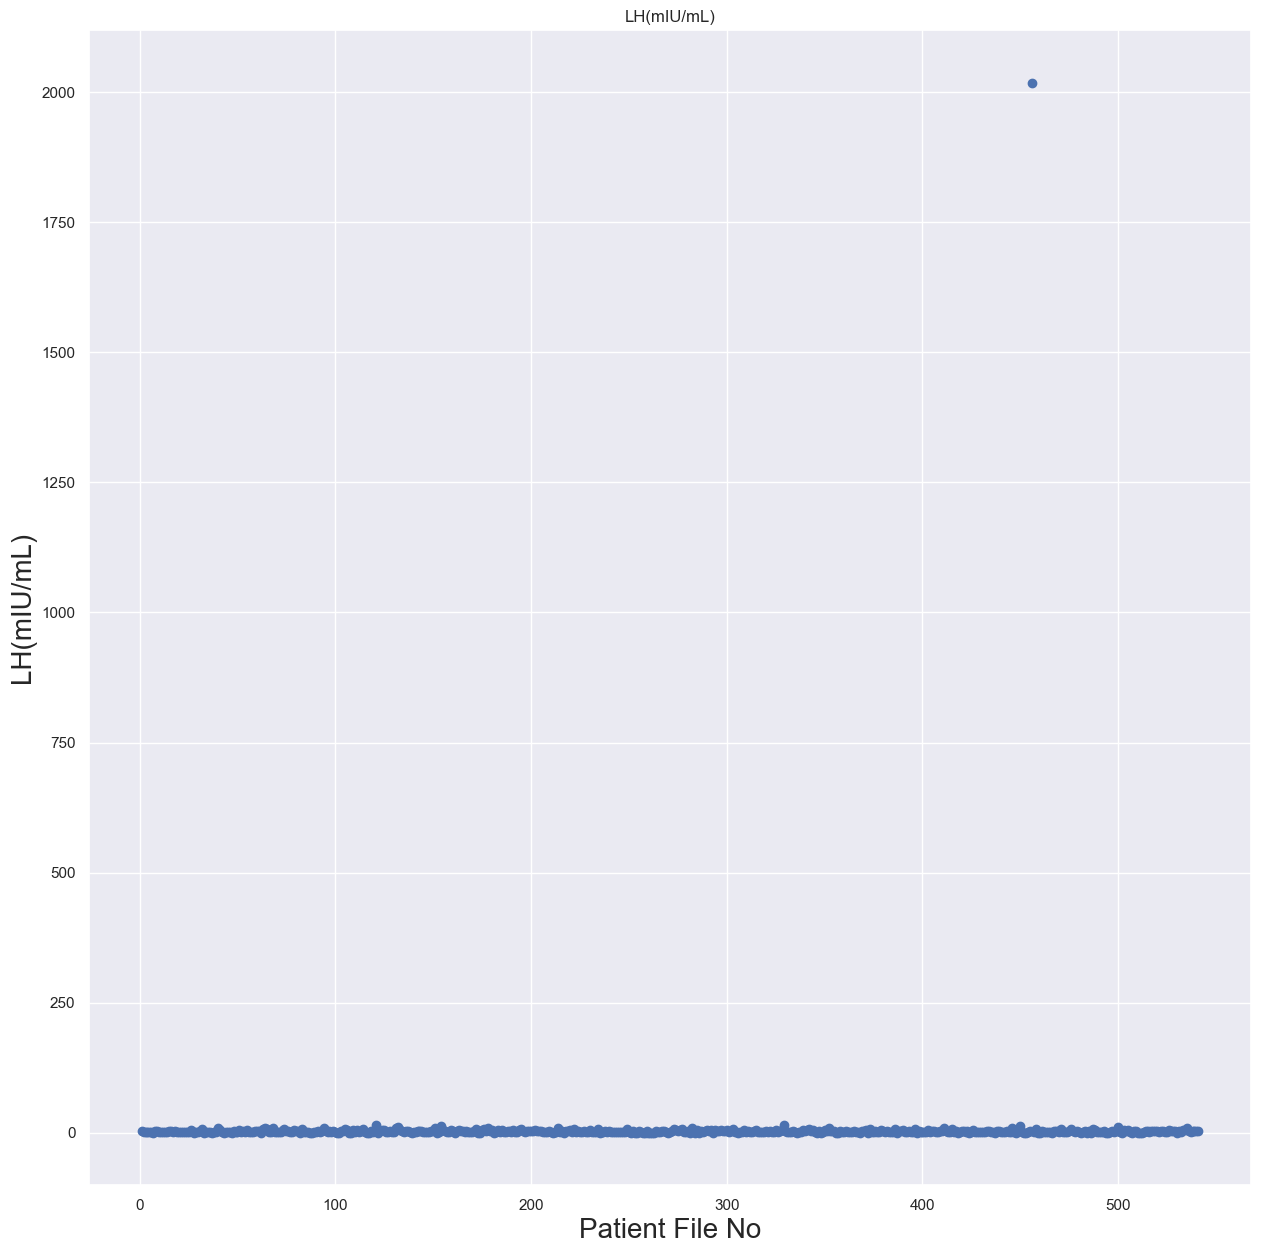

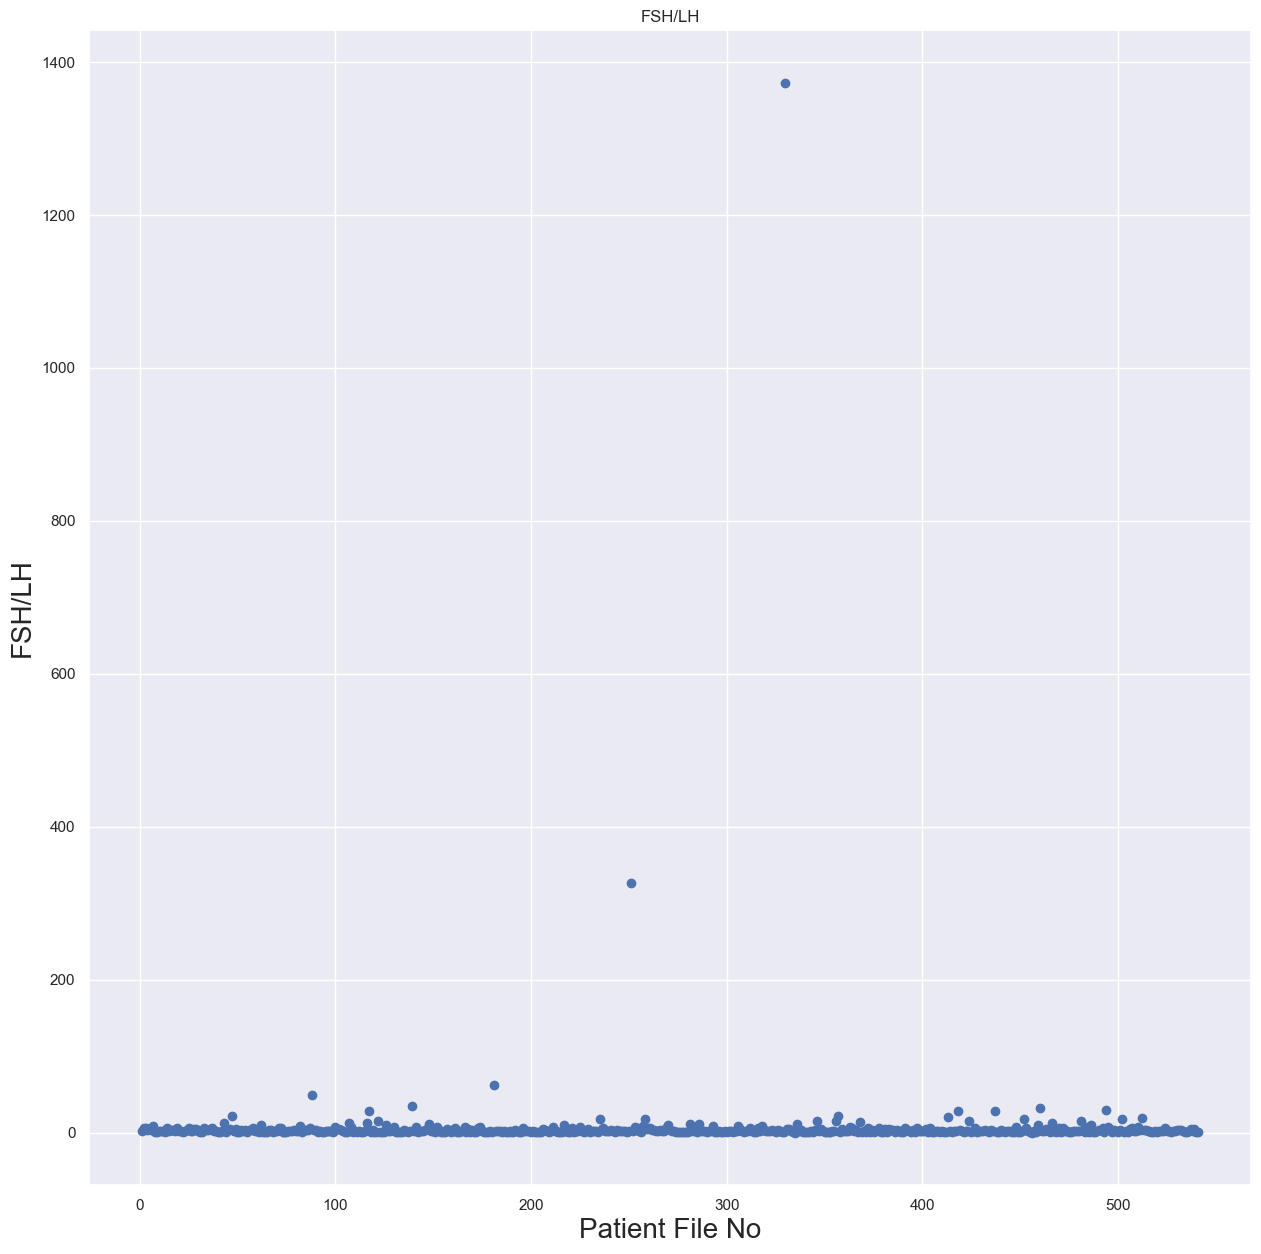

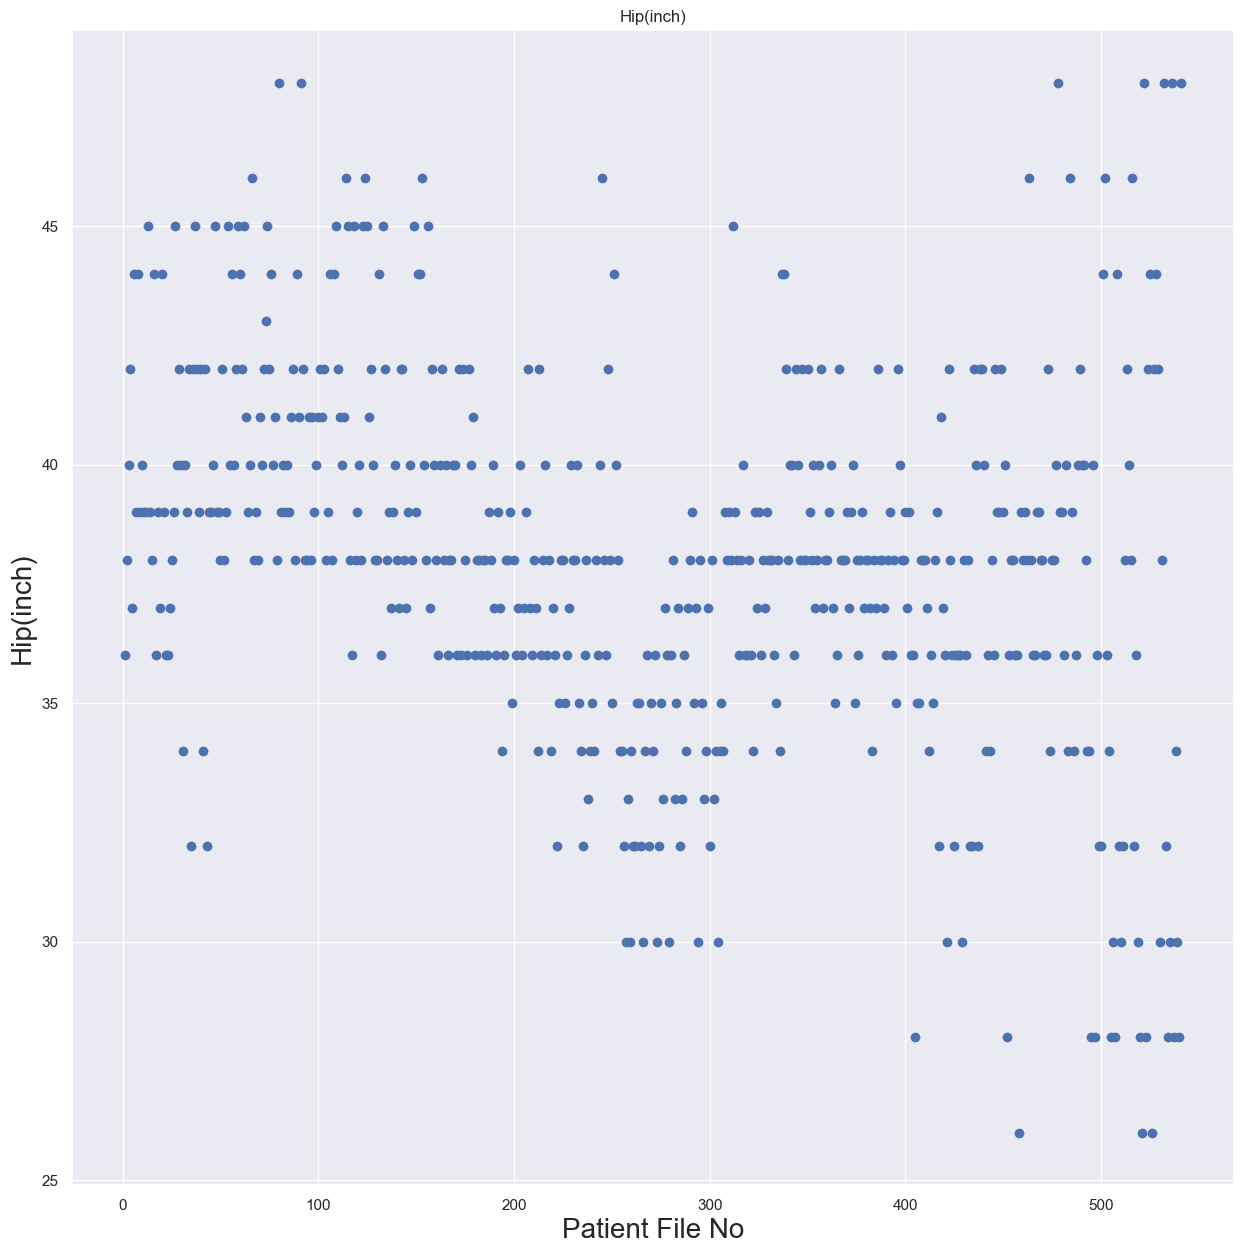

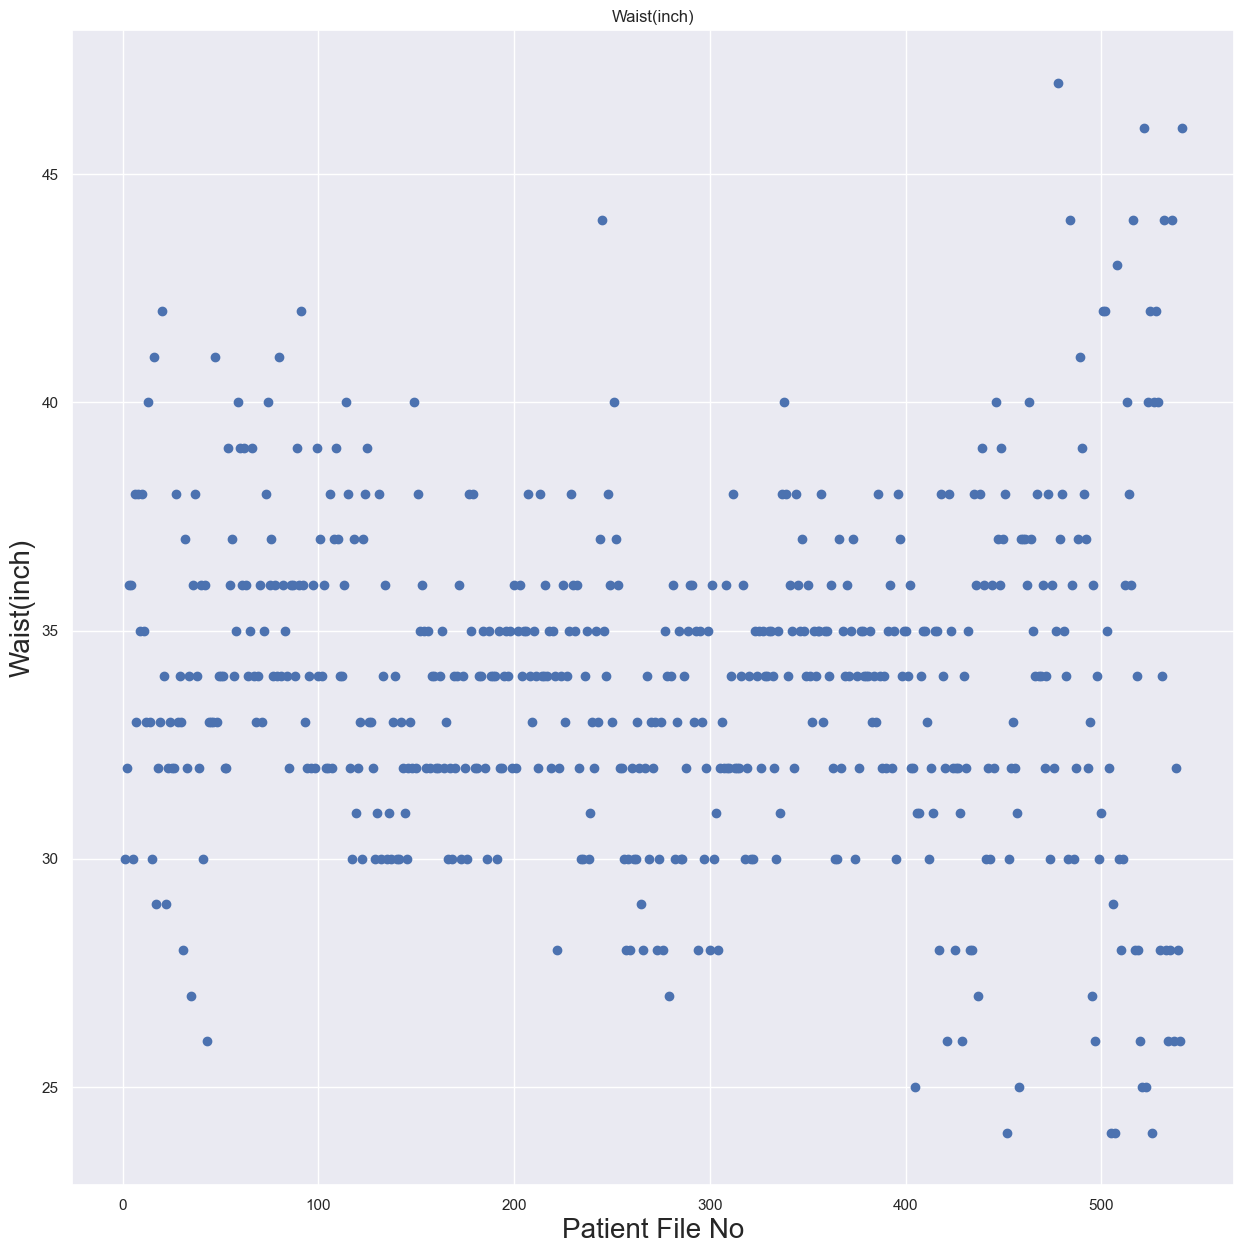

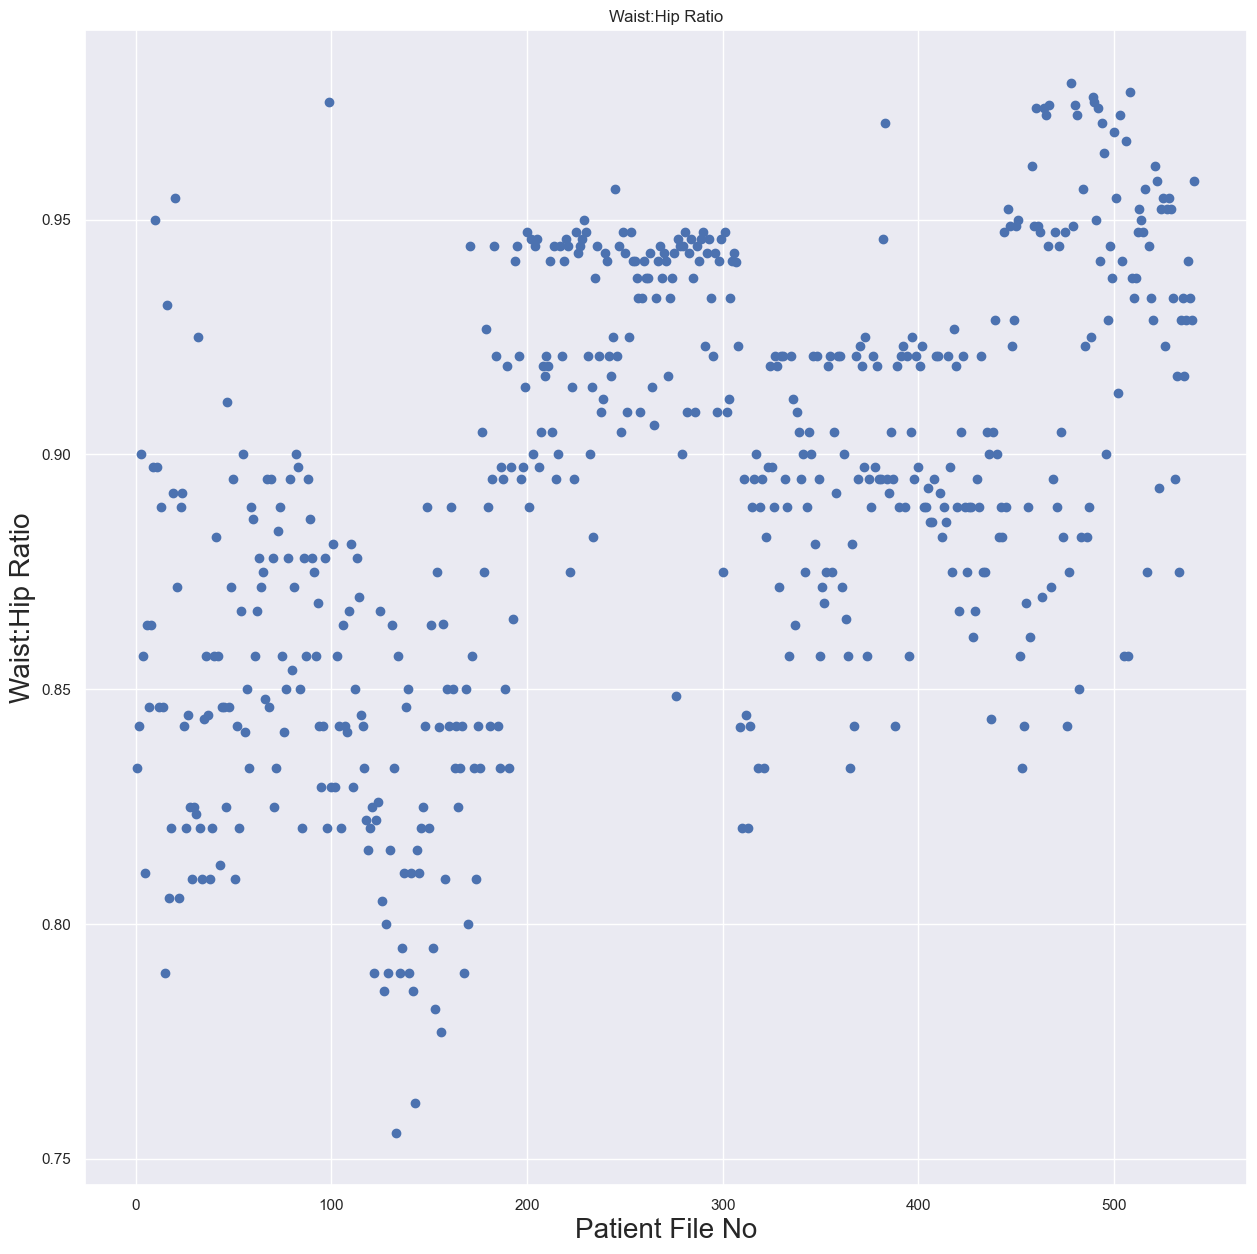

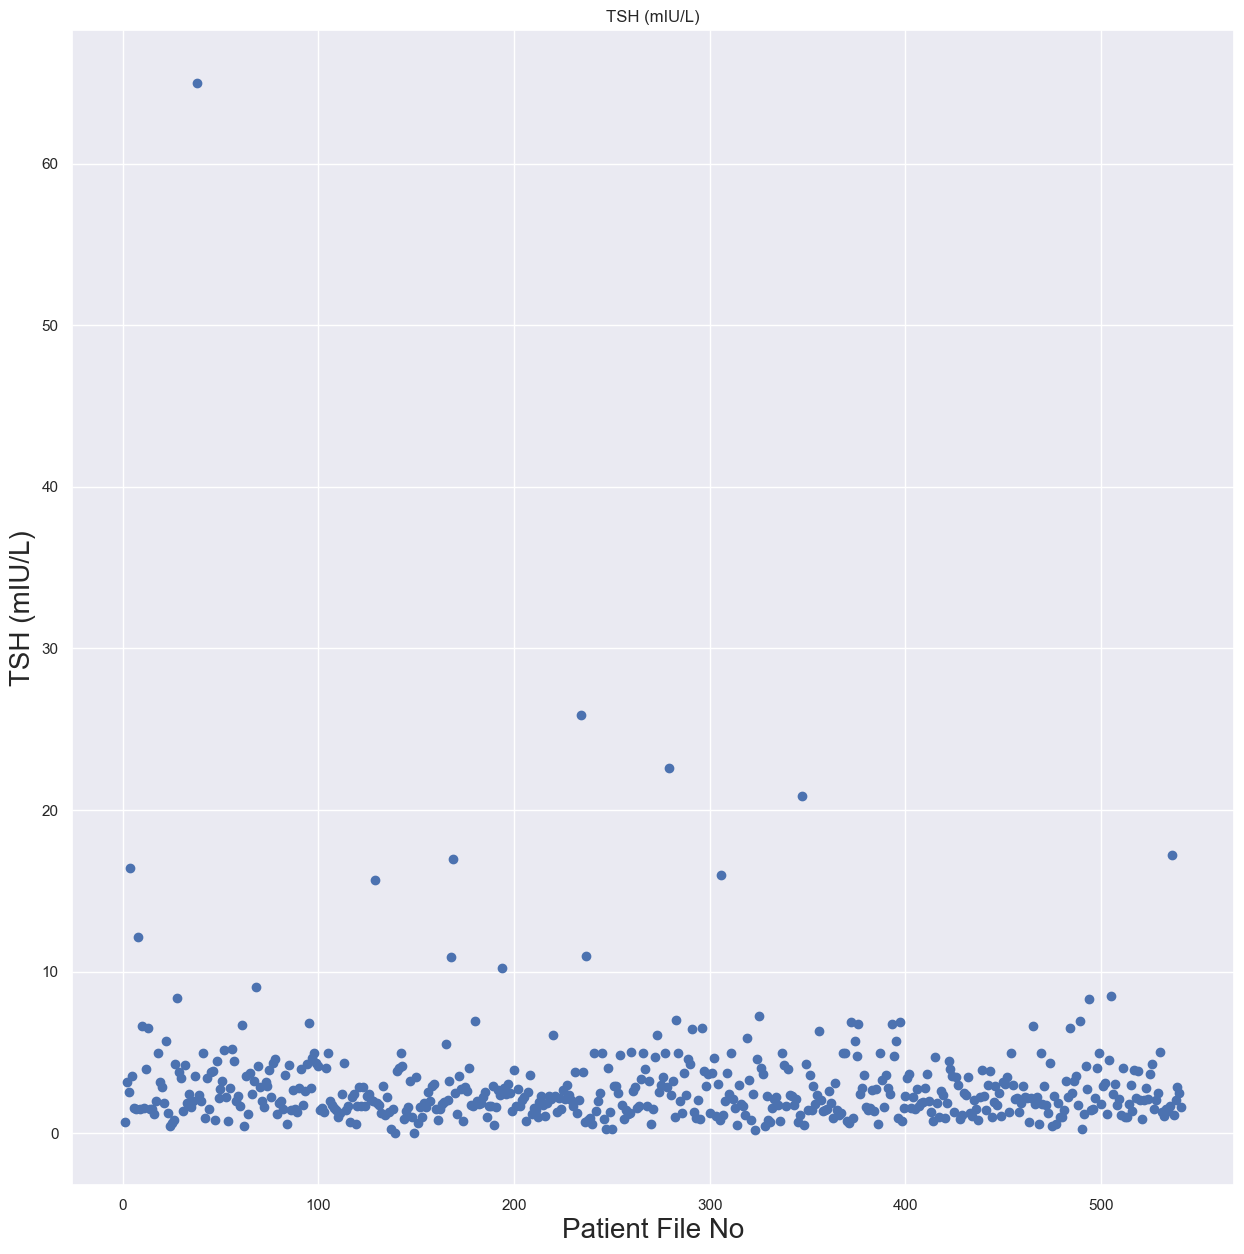

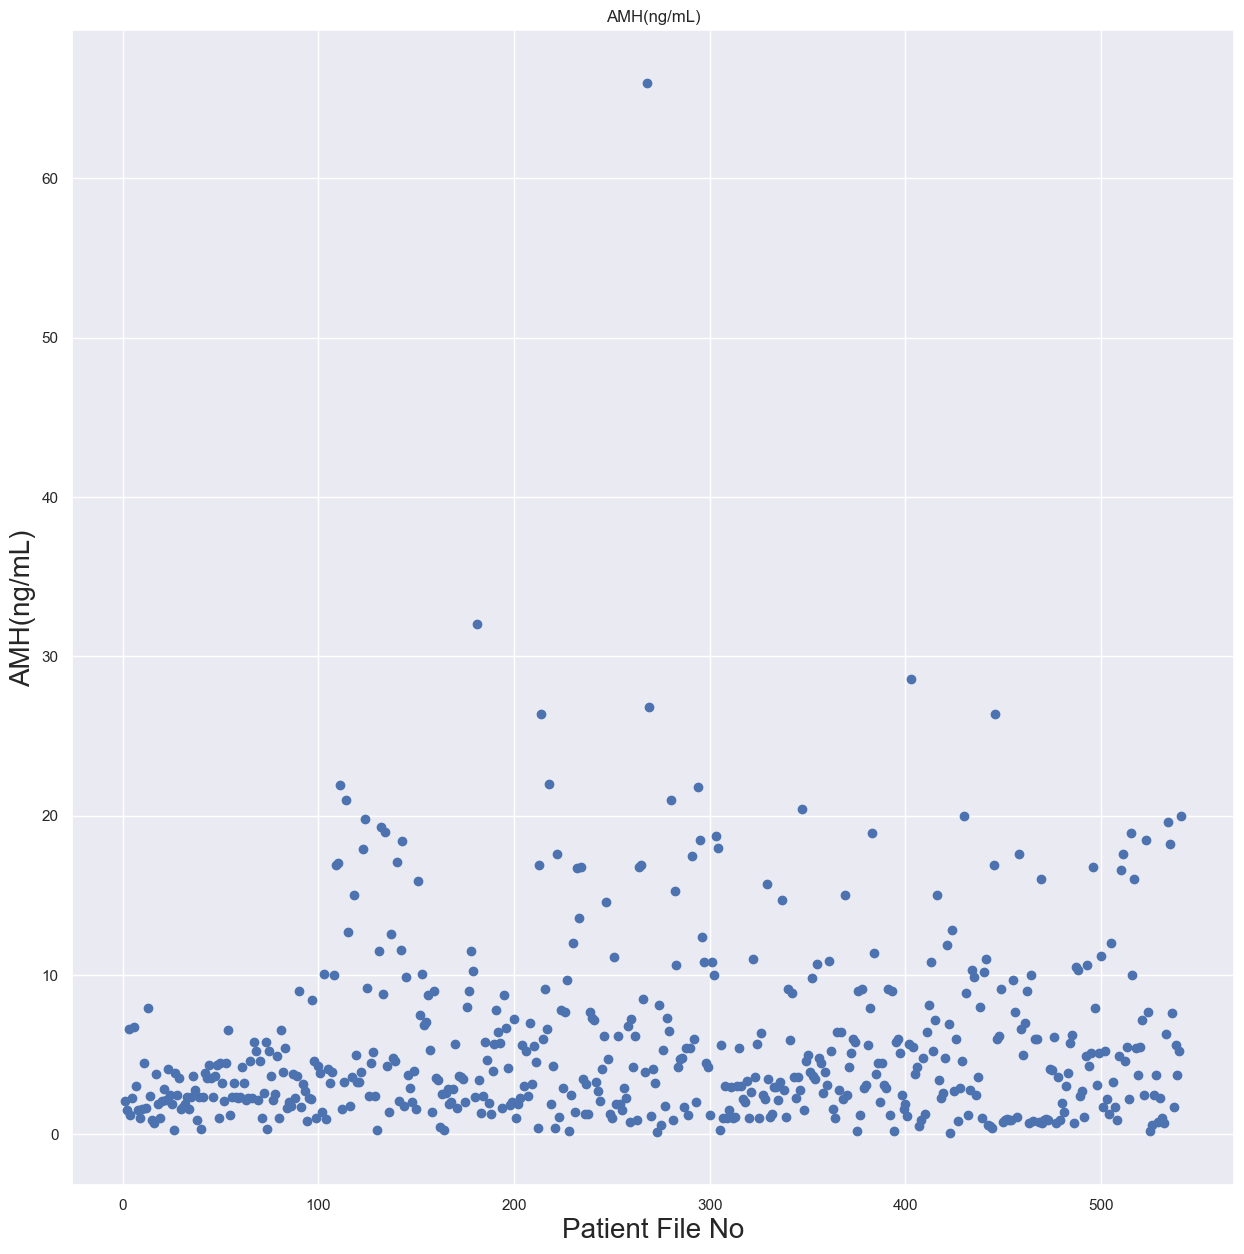

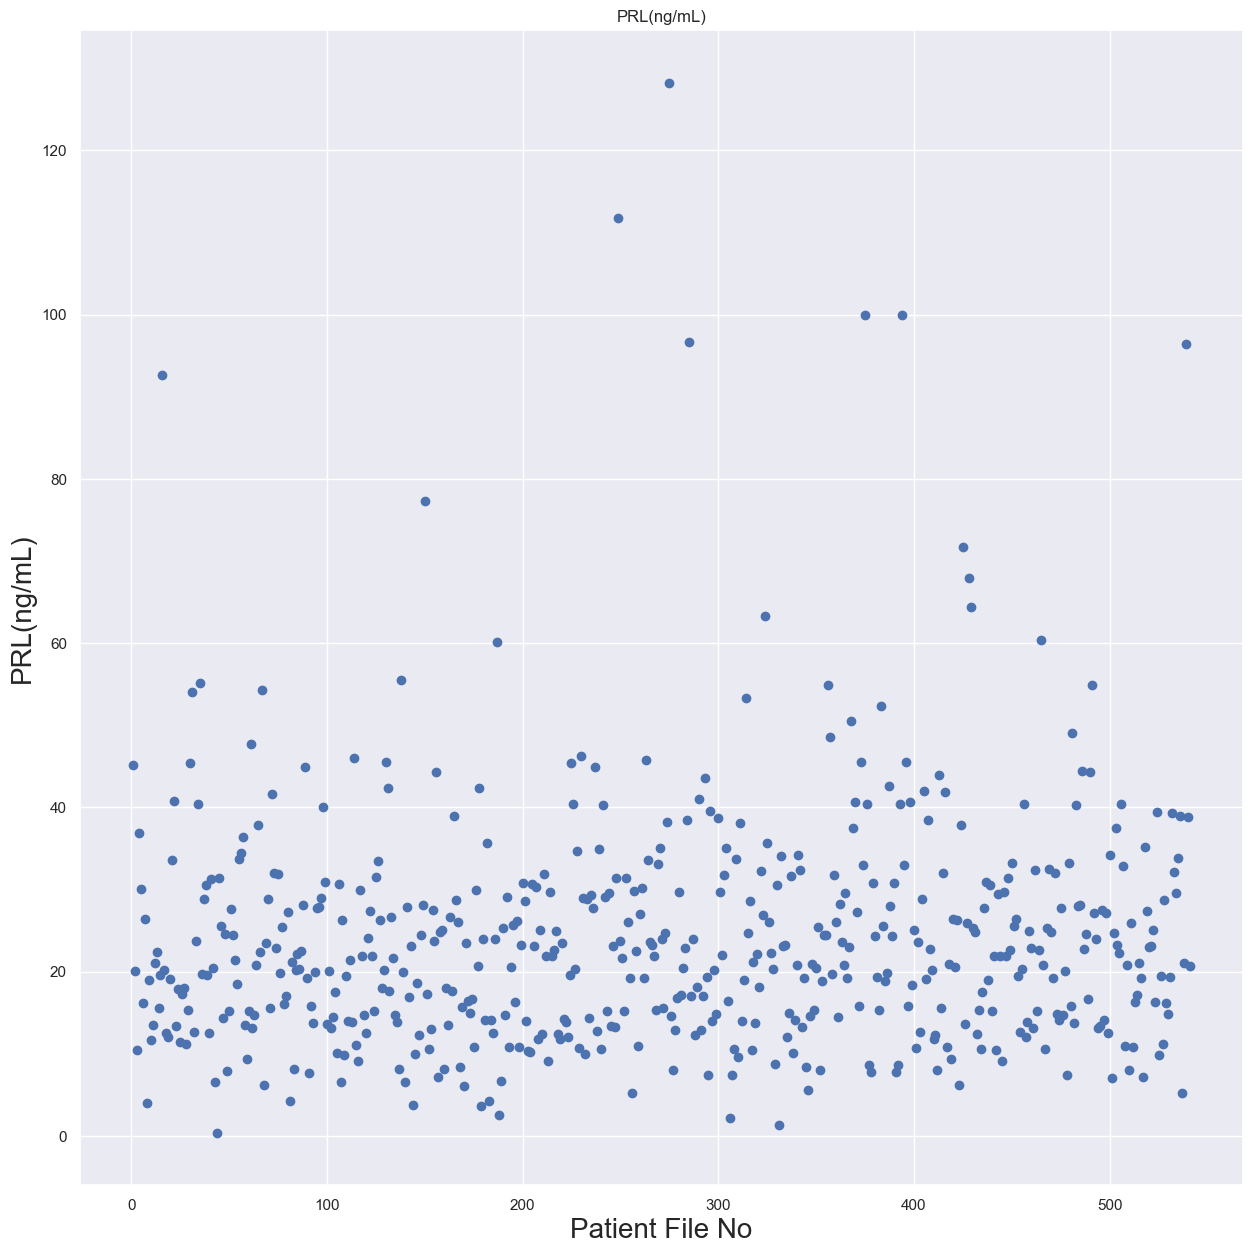

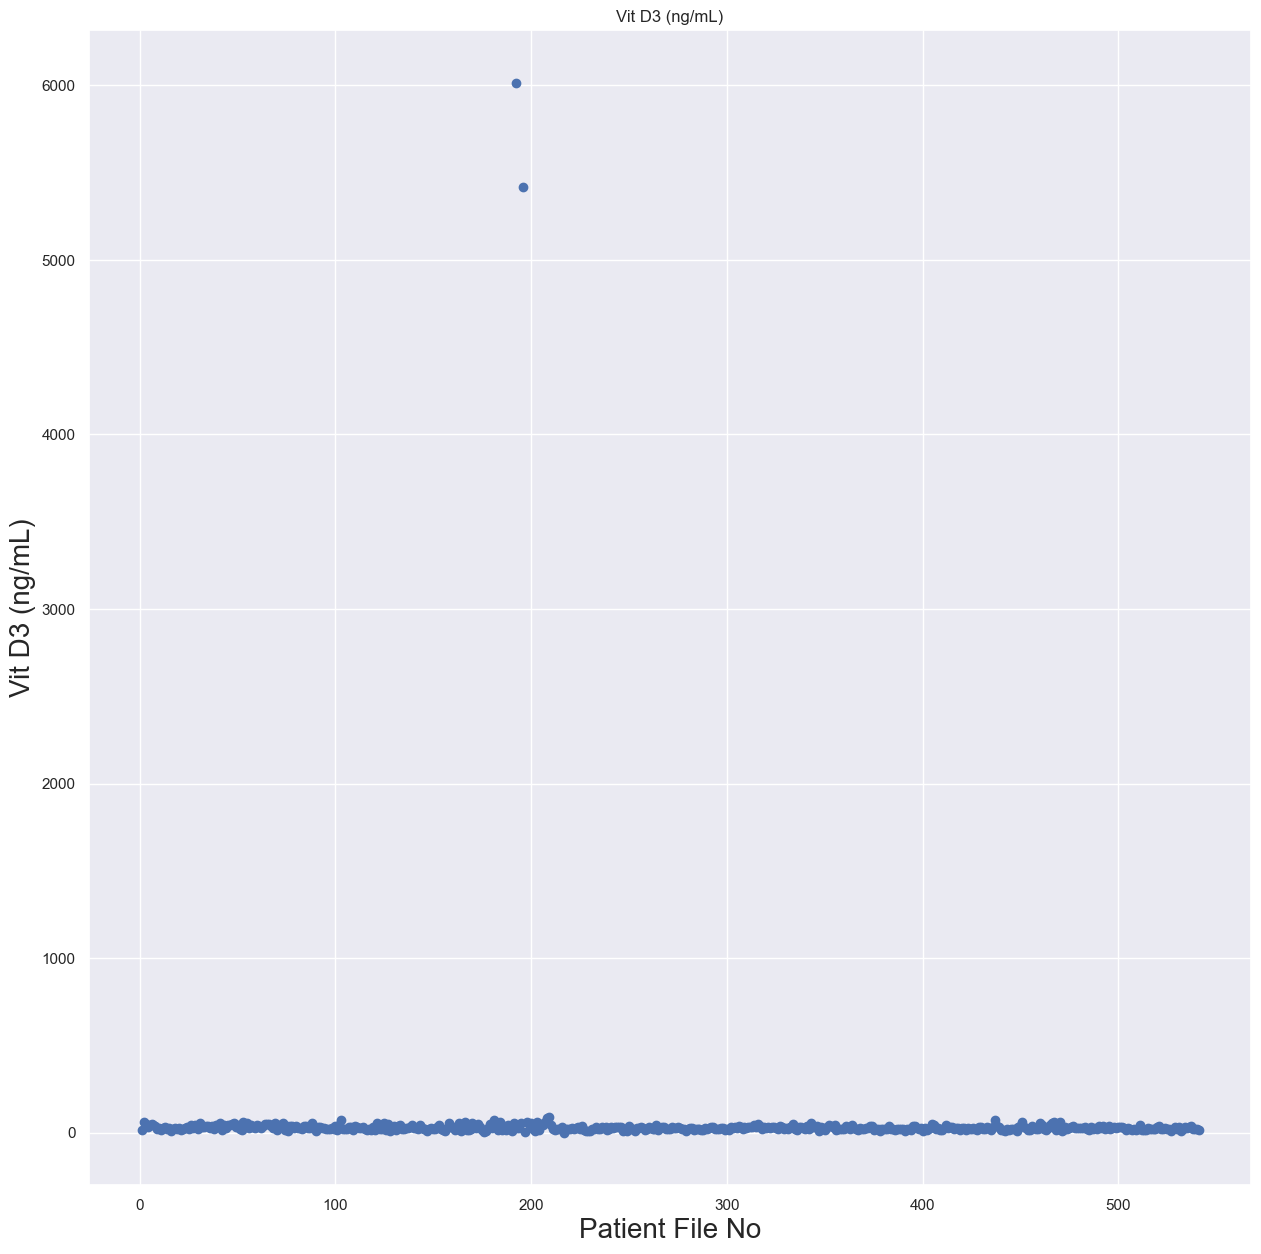

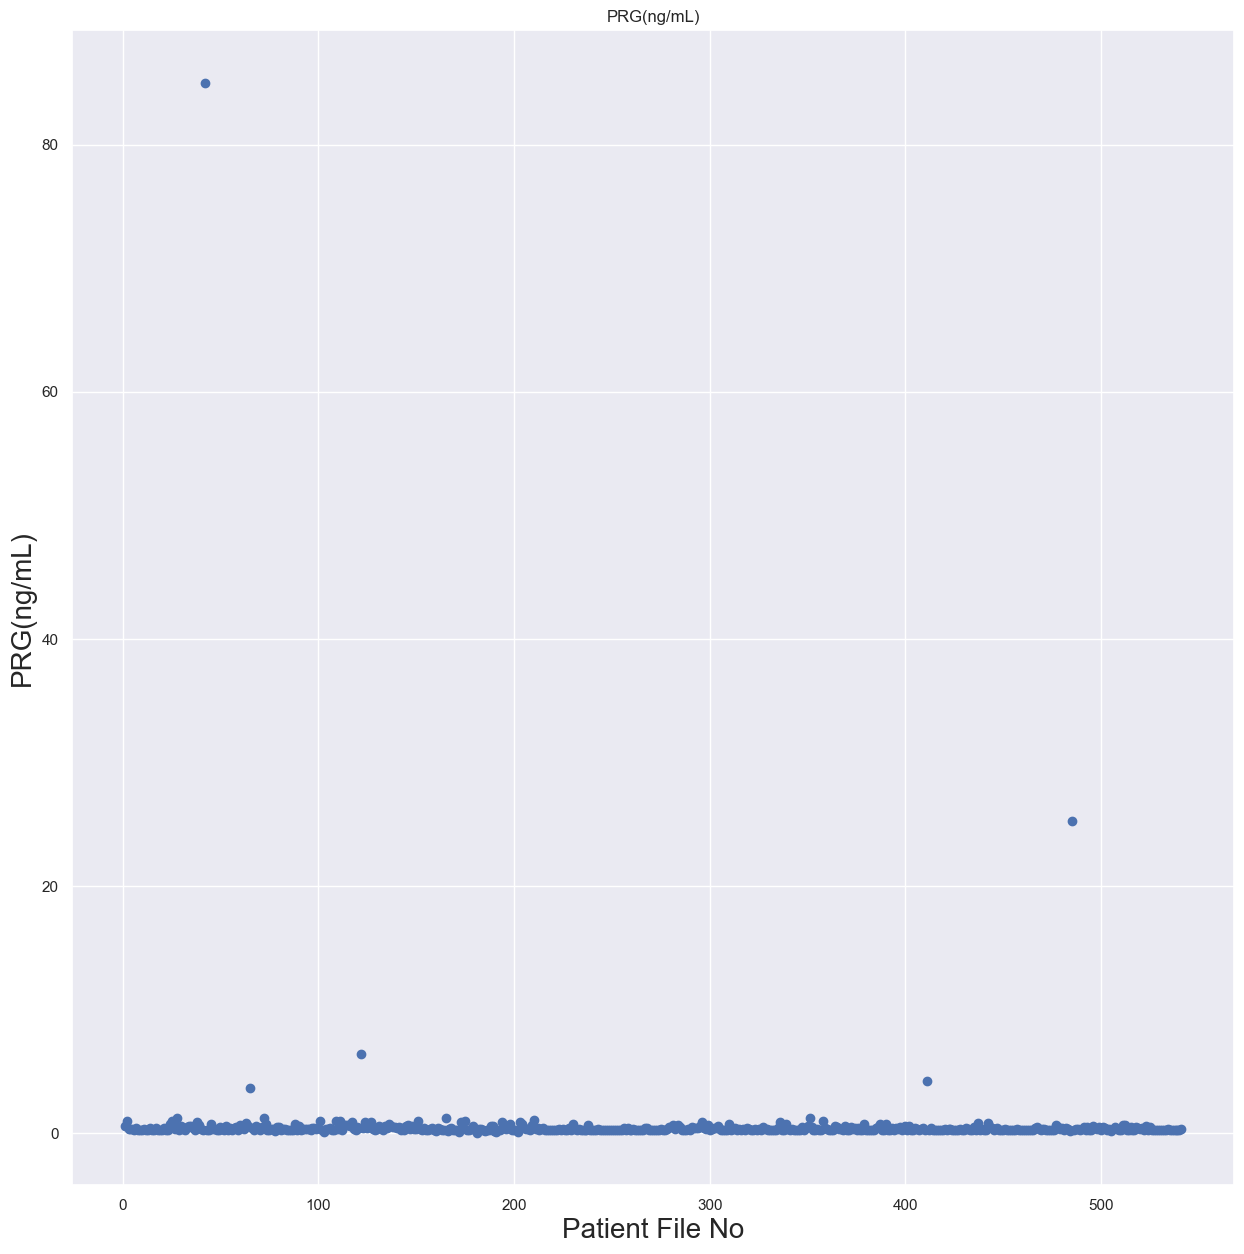

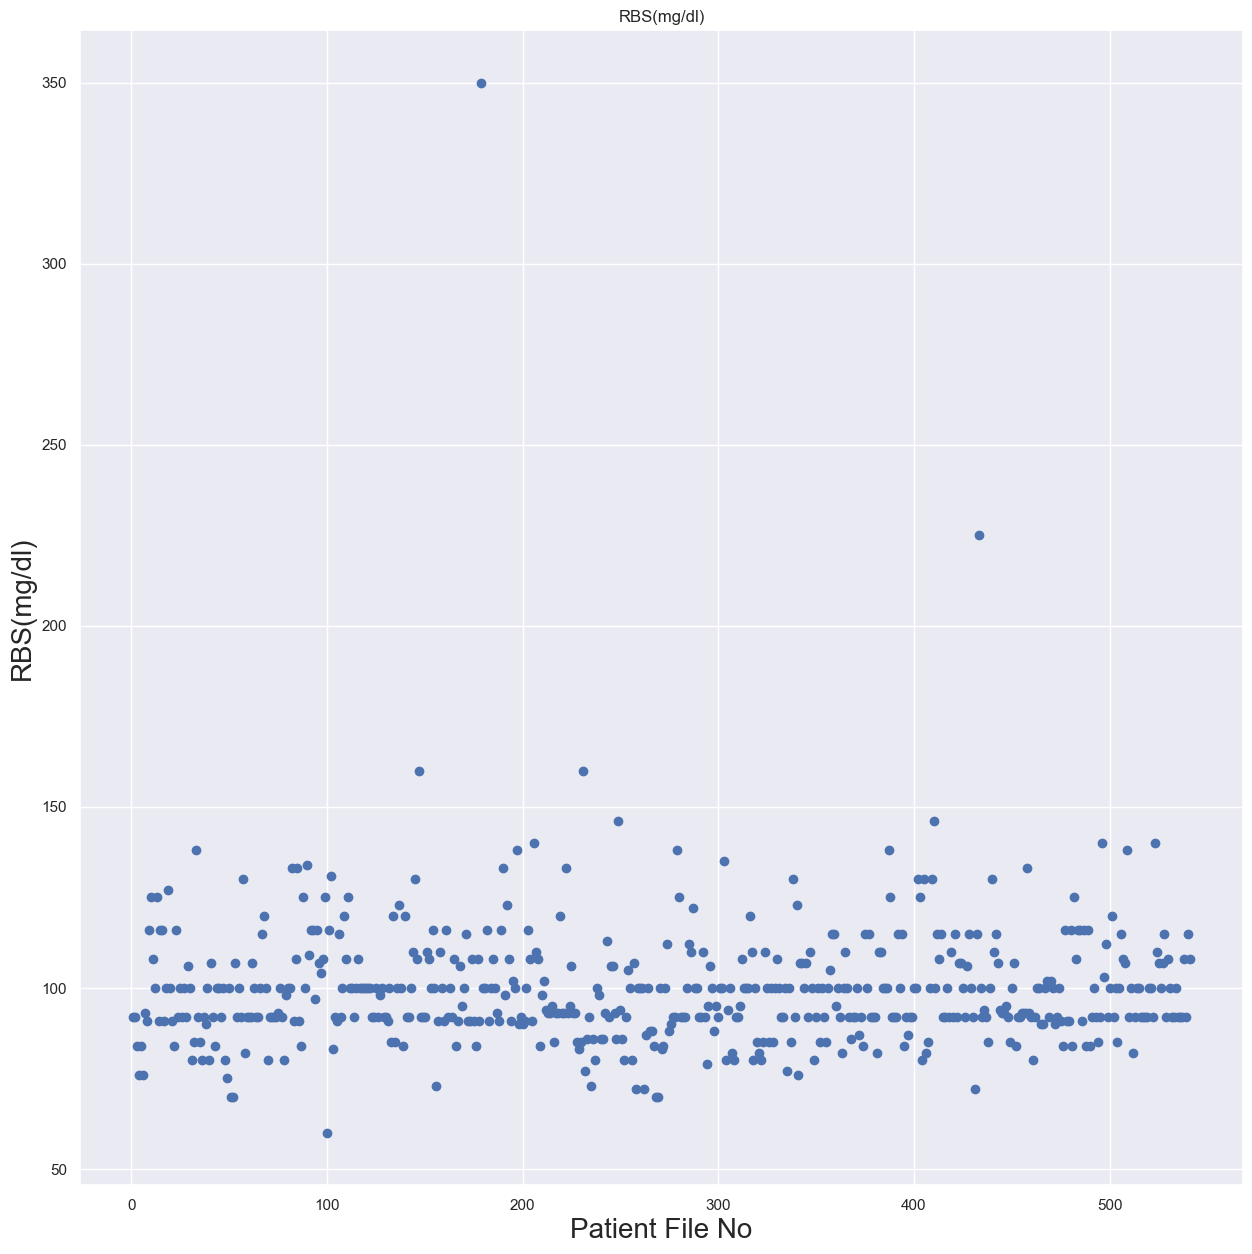

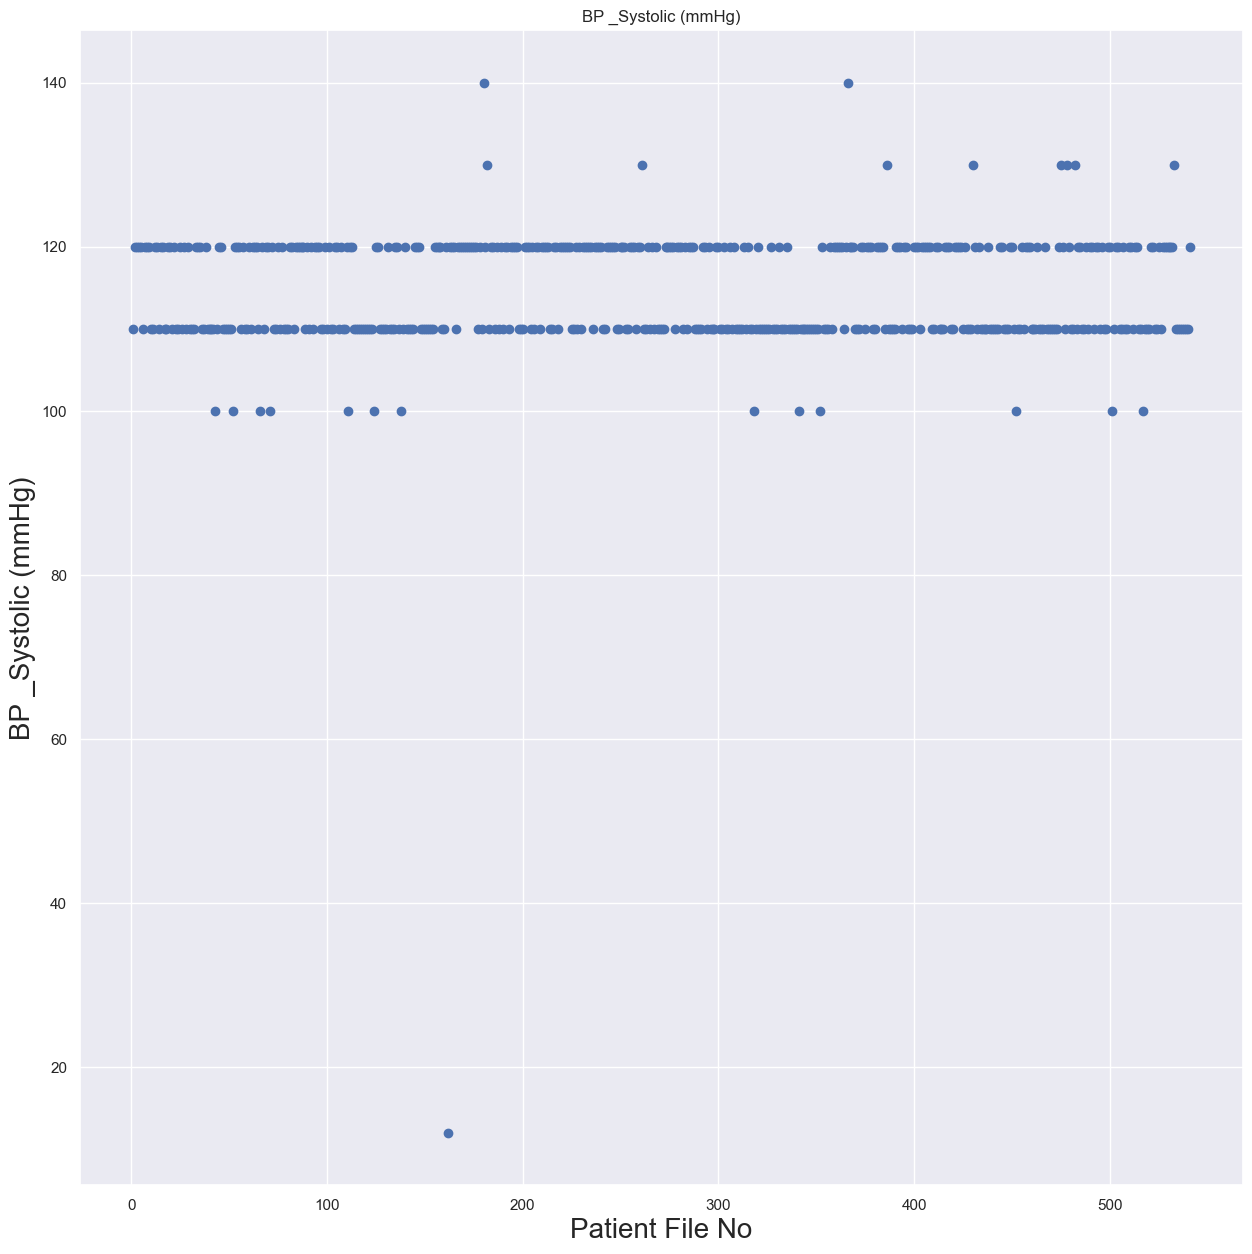

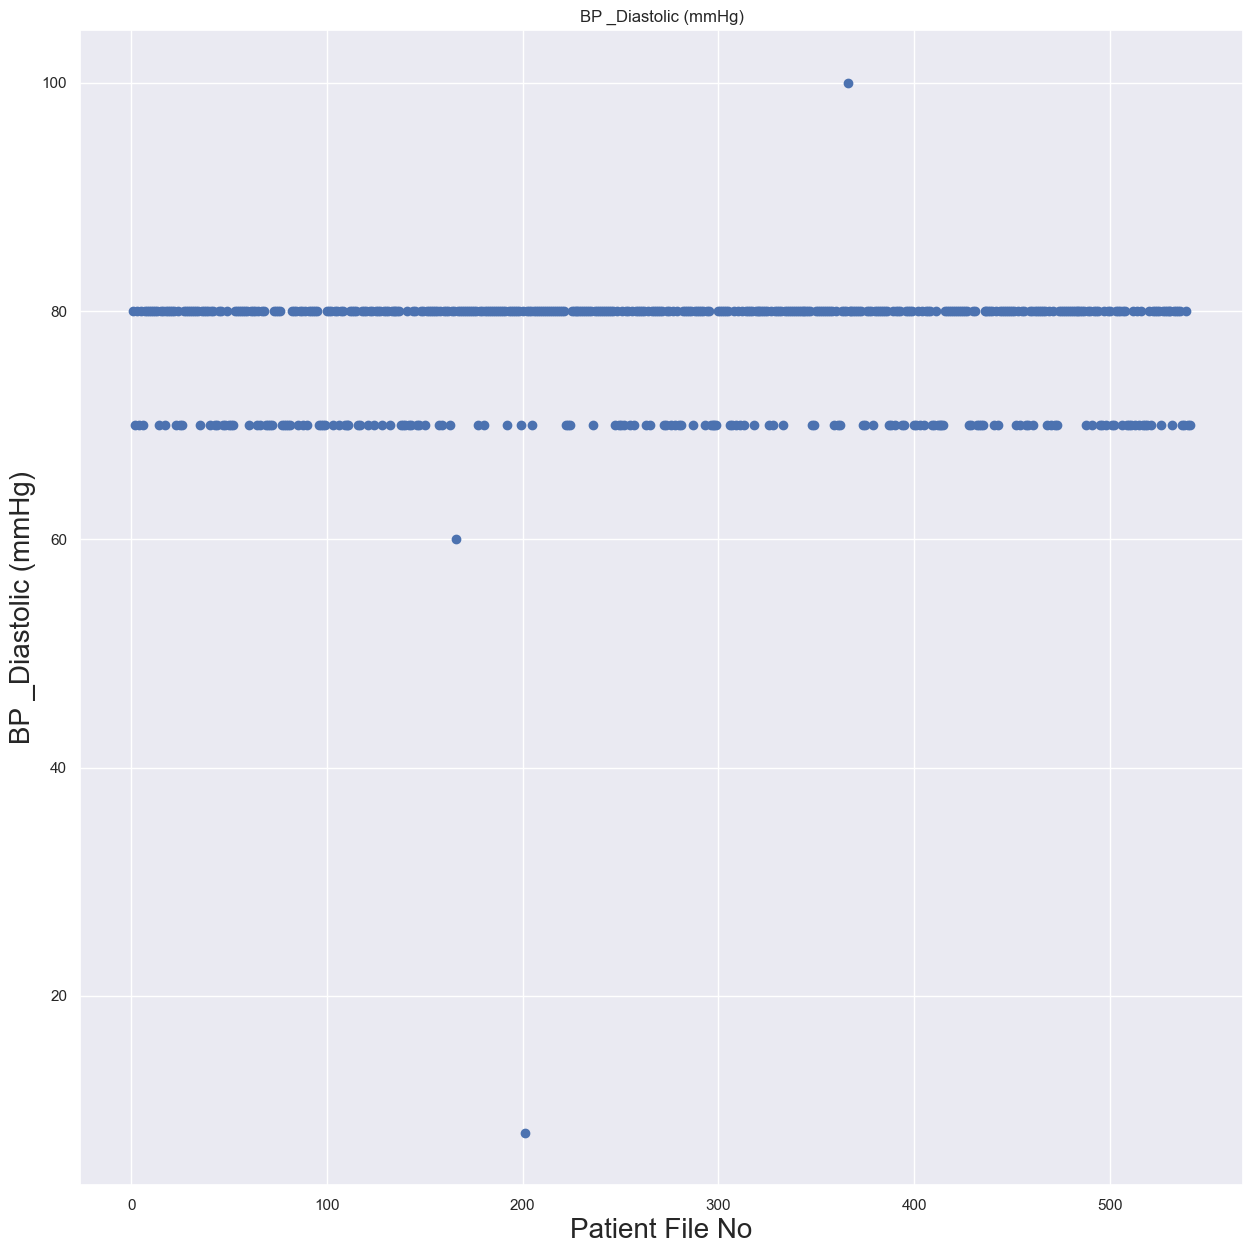

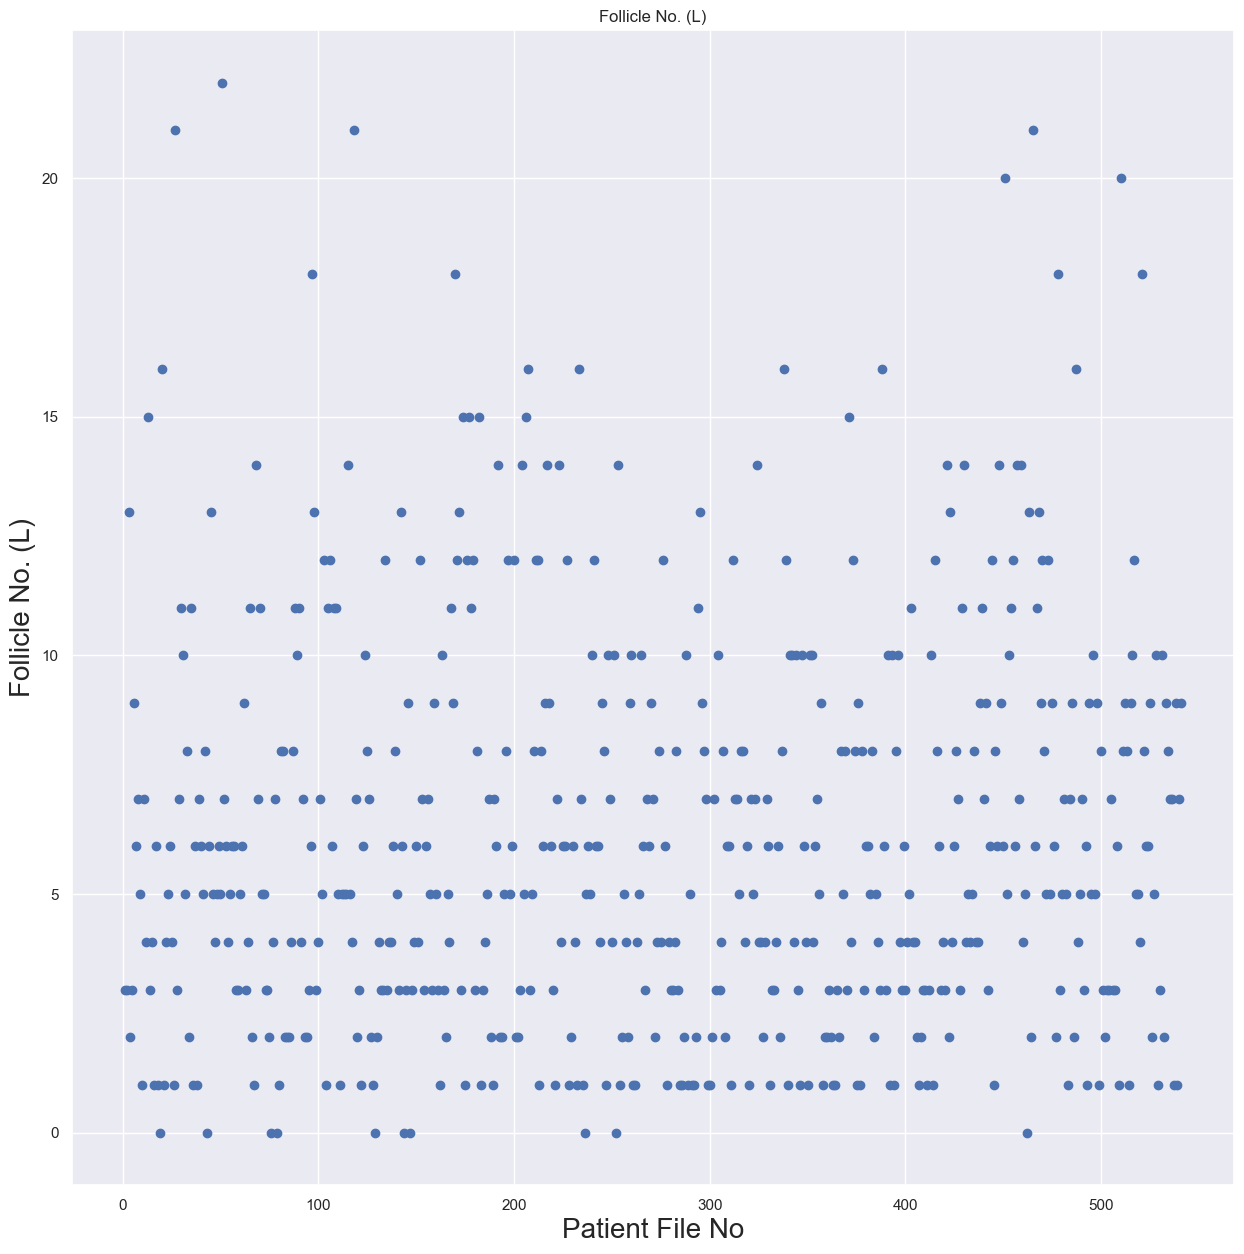

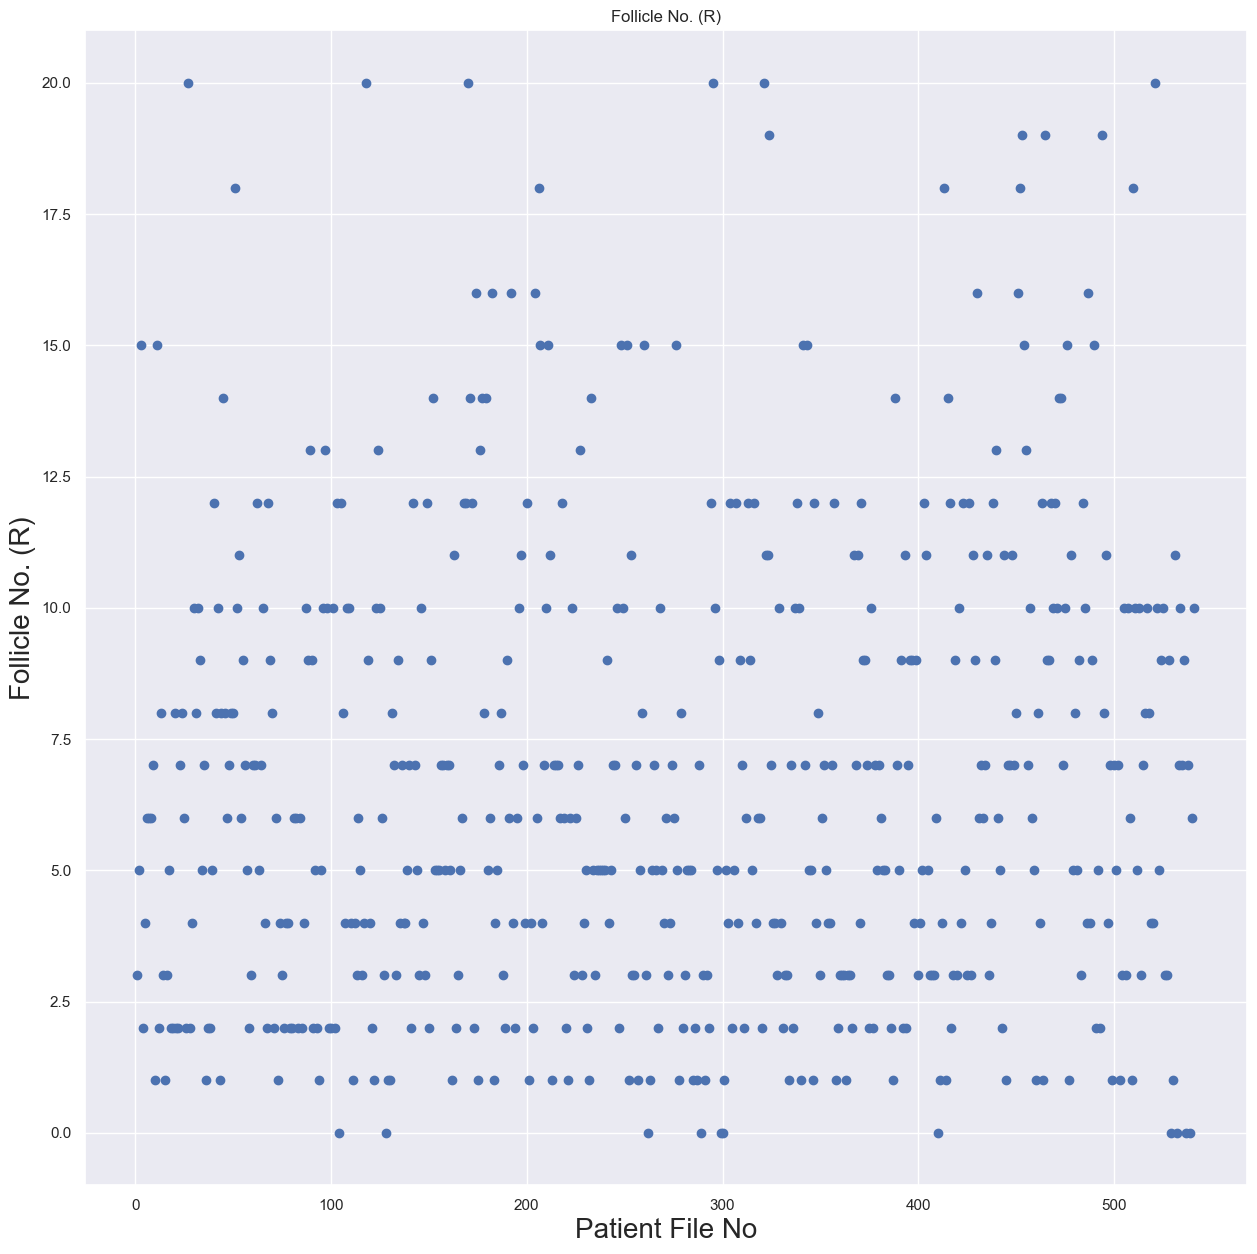

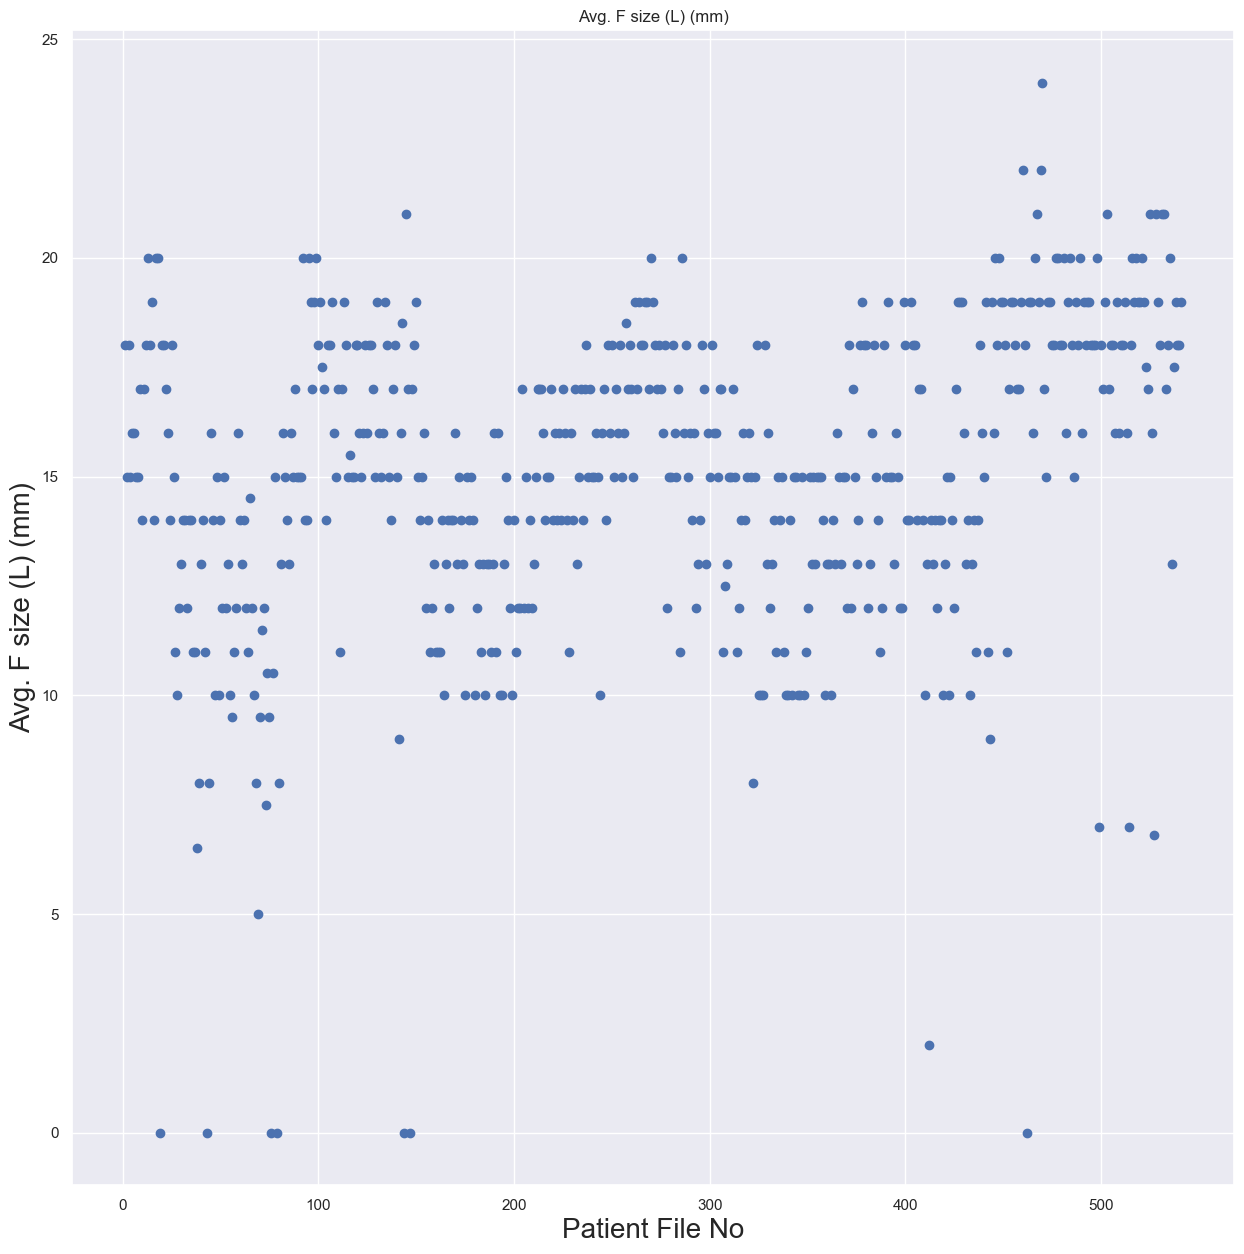

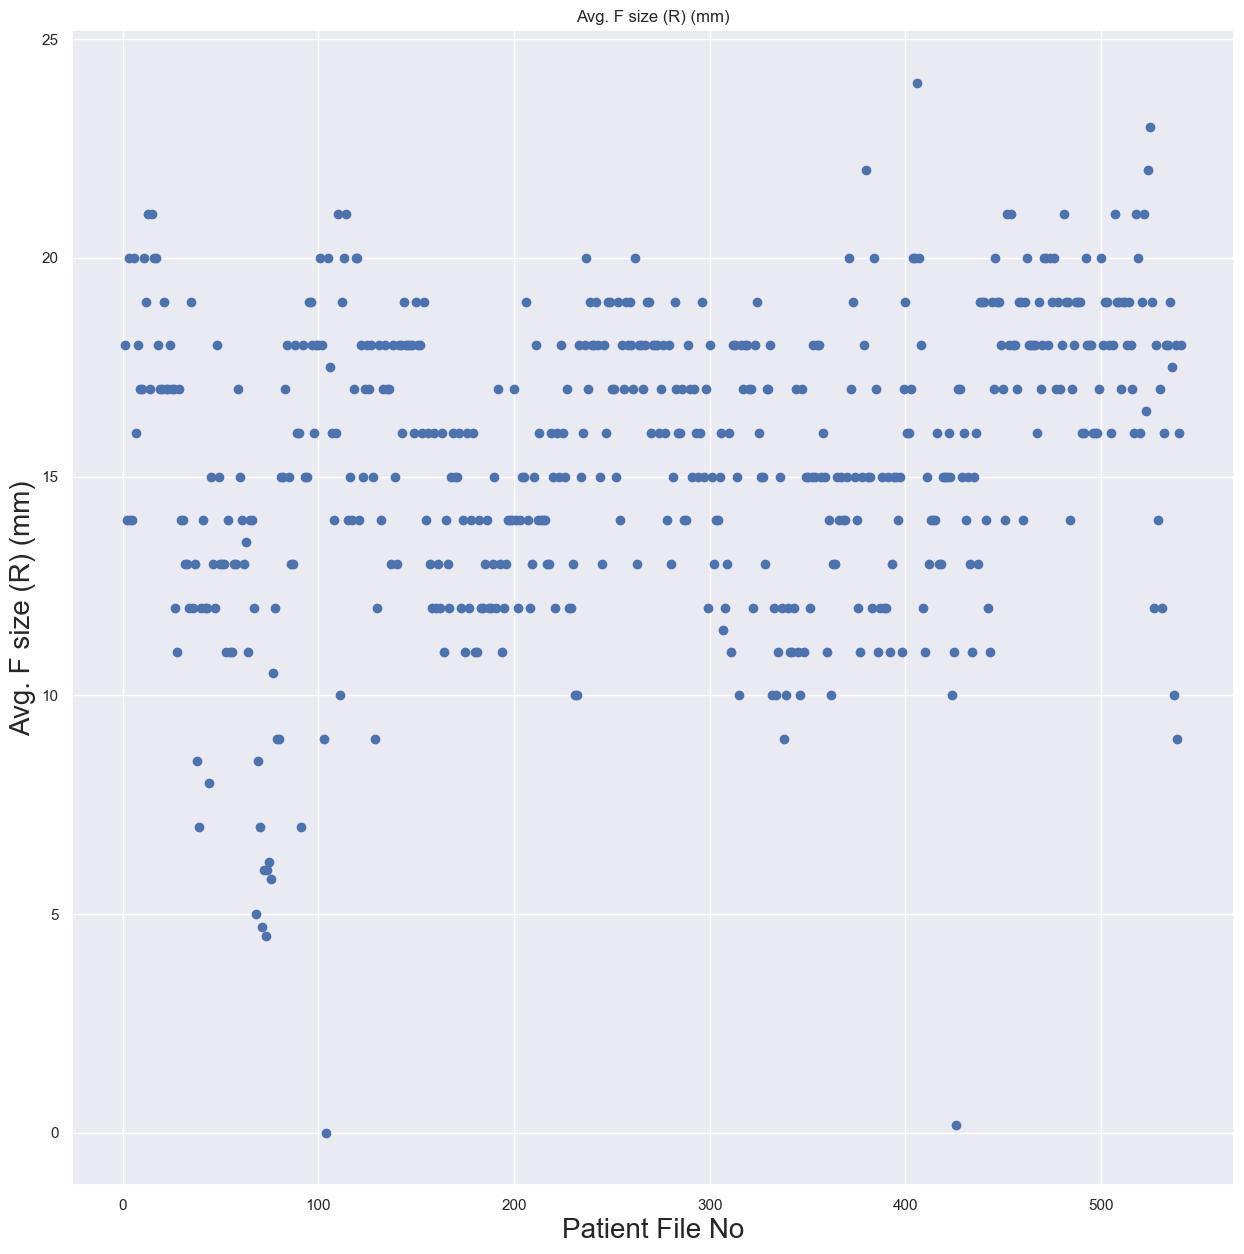

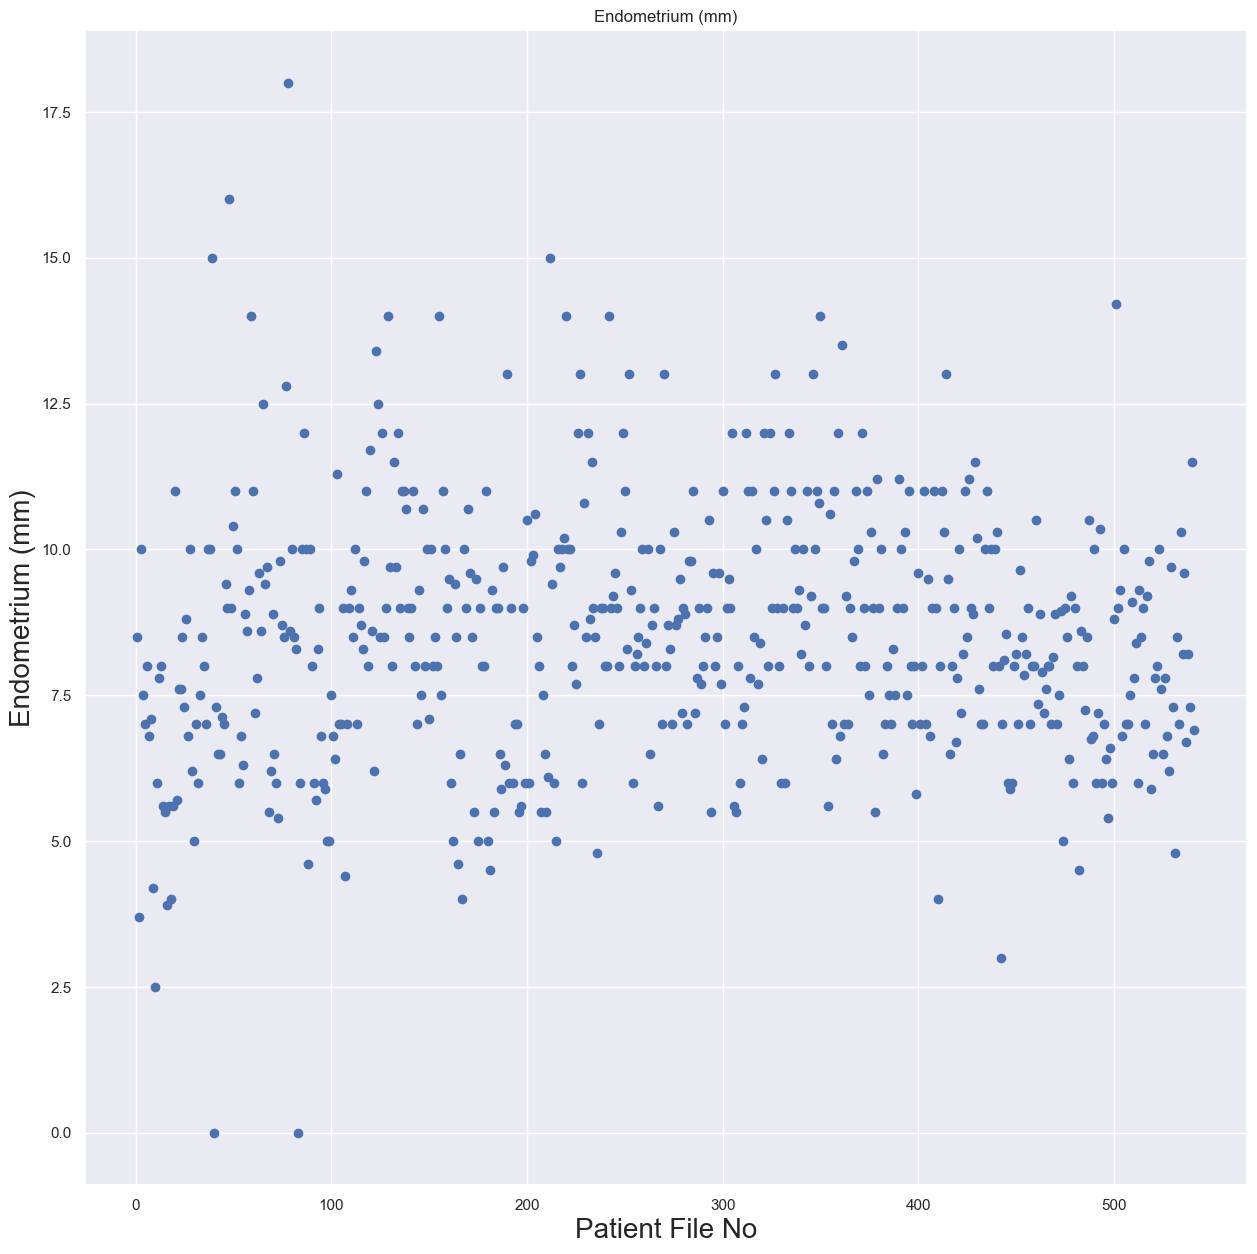

In [25]:
#Checking if there are outliars
for i in ['Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  plt.scatter(data['Patient File No.'], data[i])
  plt.xlabel('Patient File No', fontsize=20)
  plt.ylabel(i, fontsize=20)
  plt.title(i)
  plt.show()

In [26]:
#Dropping outliars
data = data[(data["Weight (Kg)"]<90)]
data = data[(data["Height(Cm)"]>140) & (data["Height(Cm)"]<175)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["I beta-HCG(mIU/mL)"]<15000)]
data = data[(data["II beta-HCG(mIU/mL)"]<15000)]
data = data[(data["FSH(mIU/mL)"]<5000)]
data = data[(data["LH(mIU/mL)"]<2000)]
data = data[(data["FSH/LH"]<1200)]
data = data[(data["TSH (mIU/L)"]<60)]
data = data[(data["Vit D3 (ng/mL)"]<5000)]
data = data[(data["AMH(ng/mL)"]<60)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["Avg. F size (L) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
 
data.shape

(507, 44)

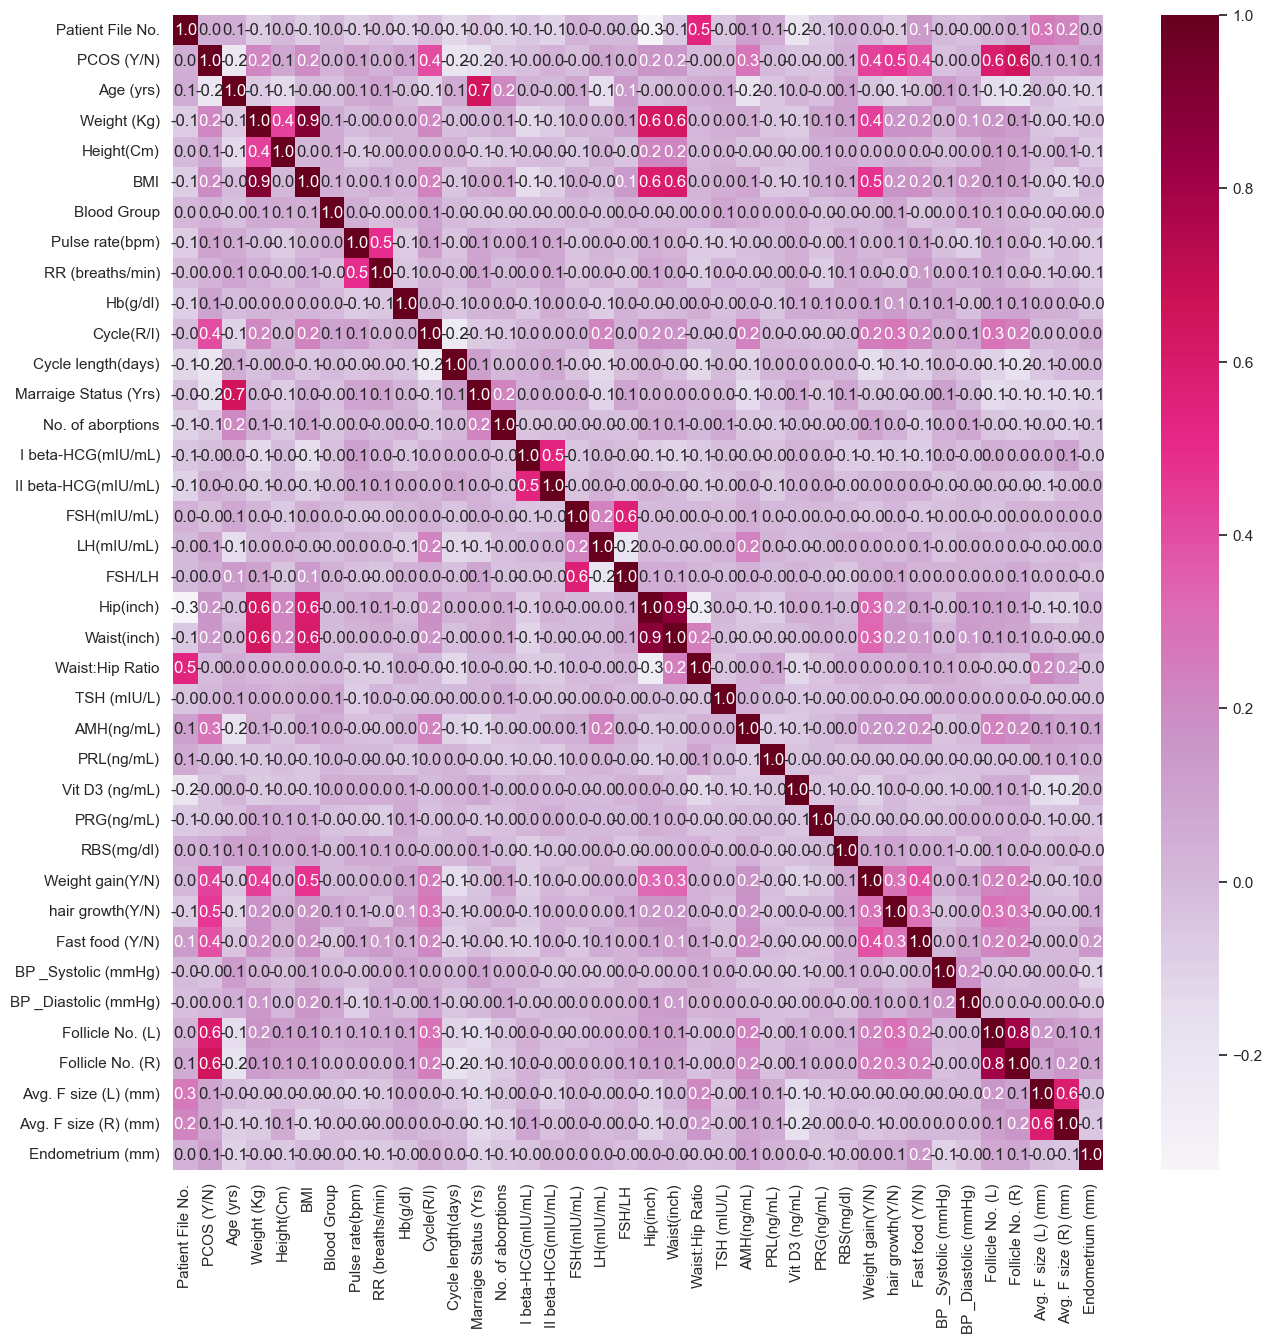

In [27]:
#Checking highly correlated columns
sns.heatmap(data.corr(), annot =True, fmt=".1f", cmap ='PuRd' )
sns.set(rc = {'figure.figsize':(200,200)})
plt.show()

In [28]:
data = data.drop(['Weight (Kg)'], axis = 1)
data = data.drop(['Height(Cm)'], axis = 1)
data = data.drop(['Waist(inch)'], axis = 1)
data = data.drop(['Hip(inch)'], axis = 1)

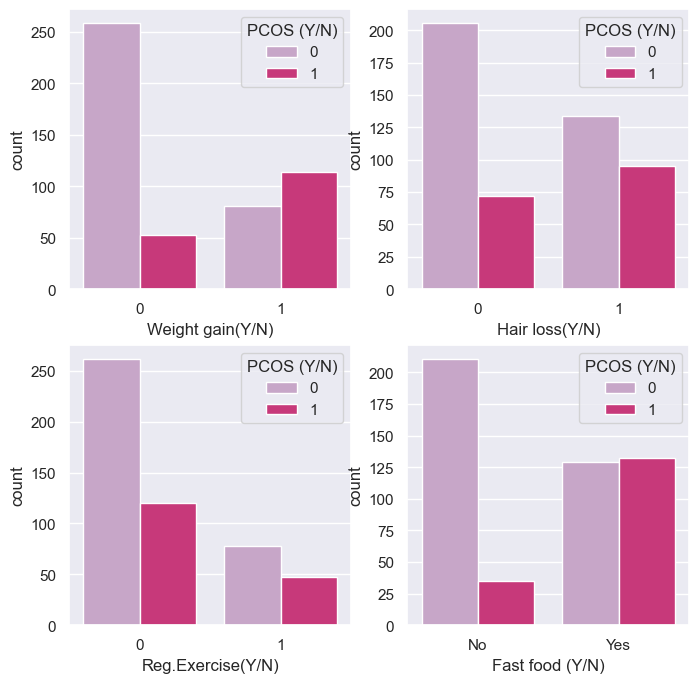

In [29]:
fig, ax = plt.subplots(2,2,figsize=(8, 8))
sns.countplot(data=data, x="Weight gain(Y/N)", hue='PCOS (Y/N)', palette='PuRd', ax=ax[0,0])
sns.countplot(data=data, x="Hair loss(Y/N)", hue='PCOS (Y/N)', palette='PuRd', ax=ax[0,1])
sns.countplot(data=data, x="Reg.Exercise(Y/N)", hue='PCOS (Y/N)', palette='PuRd', ax=ax[1,0])
sns.countplot(data=data, x="Fast food (Y/N)", hue='PCOS (Y/N)', palette='PuRd', ax=ax[1,1])
#sns.countplot(df['bowling'], ax=ax[1])

plt.xticks([0,1], ['No', 'Yes'])

plt.show()

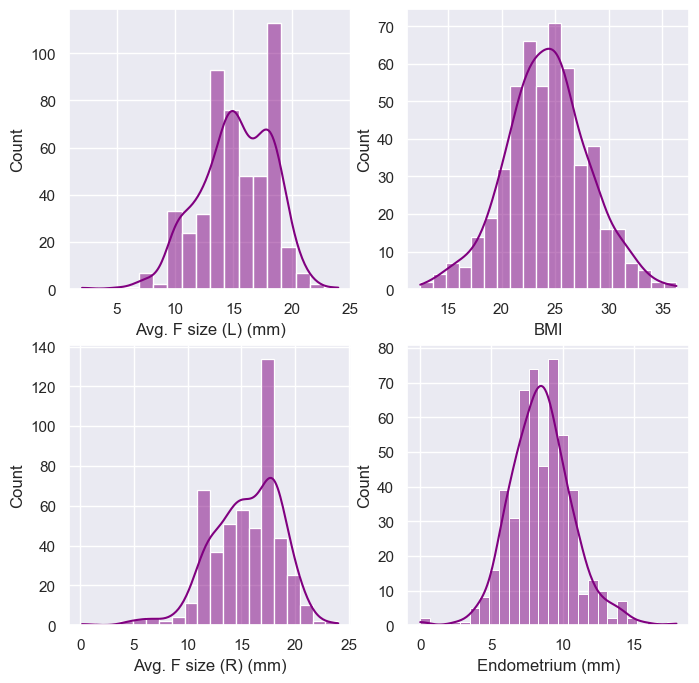

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data=data, x="Avg. F size (L) (mm)", kde=True, color='purple', ax=axs[0, 0])
sns.histplot(data=data, x="Avg. F size (R) (mm)", kde=True, color='purple', ax=axs[1, 0])
sns.histplot(data=data, x="BMI", kde=True, color='purple', ax=axs[0, 1])
sns.histplot(data=data, x="Endometrium (mm)", kde=True, color='purple', ax=axs[1, 1])

plt.show()

In [31]:
#This column is not necessary anymore
data = data.drop(['Patient File No.'], axis = 1) 

## Models

In [32]:
y = data['PCOS (Y/N)'].values
X = data.drop('PCOS (Y/N)', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [33]:
y = data['PCOS (Y/N)']
X = data.drop('PCOS (Y/N)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### K-Nearest Neighbors(KNN)

In [34]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
confusion_matrix(y_test,y_predict)

0.7007874015748031


array([[82,  9],
       [29,  7]], dtype=int64)

First KNN model's score is not very good. I will try it with different k's.

I took the code block below from this work:
https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [35]:
train_scores = []
test_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

In [36]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 72.44094488188976 % and k = [8]


In [37]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [38]:
model = KNeighborsClassifier(n_neighbors= 8, metric= 'minkowski', p= 2,)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.7244094488188977


Predicted,0,1,All
True,,,
0,86,5,91
1,30,6,36
All,116,11,127


In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        91
           1       0.55      0.17      0.26        36

    accuracy                           0.72       127
   macro avg       0.64      0.56      0.54       127
weighted avg       0.69      0.72      0.67       127



In [40]:
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 1.0


### Logistic Regression

In [41]:
model = LogisticRegression(max_iter=150)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.8818897637795275


Predicted,0,1,All
True,,,
0,85,6,91
1,9,27,36
All,94,33,127


In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        91
           1       0.82      0.75      0.78        36

    accuracy                           0.88       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.88      0.88      0.88       127



In [43]:
model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 150,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
model = LogisticRegression(C=1)

model.fit(X,y)

prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.9999999999891767


In [45]:
#Converting to arrays
y = data['PCOS (Y/N)'].values
X = data.drop('PCOS (Y/N)', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict))
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.8768472906403941
[[134  15]
 [ 10  44]]


Predicted,0,1,All
True,,,
0,134,15,149
1,10,44,54
All,144,59,203


In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       149
           1       0.75      0.81      0.78        54

    accuracy                           0.88       203
   macro avg       0.84      0.86      0.85       203
weighted avg       0.88      0.88      0.88       203



### Support Vector Machine(SVM)

In [47]:
model1 = SVC(max_iter=1500,kernel="poly",C=1.0,degree=2)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

print(model1.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.7241379310344828


Predicted,0,1,All
True,,,
0,134,15,149
1,10,44,54
All,144,59,203


In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       149
           1       0.75      0.81      0.78        54

    accuracy                           0.88       203
   macro avg       0.84      0.86      0.85       203
weighted avg       0.88      0.88      0.88       203



In [49]:
model = SVC(max_iter=1500,kernel='rbf',C=2.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.6748768472906403


Predicted,0,1,All
True,,,
0,134,15,149
1,10,44,54
All,144,59,203


In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       149
           1       0.75      0.81      0.78        54

    accuracy                           0.88       203
   macro avg       0.84      0.86      0.85       203
weighted avg       0.88      0.88      0.88       203



In [51]:
model = SVC(max_iter=1500,kernel="linear",C=1.0,degree=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.9753694581280788


Predicted,0,1,All
True,,,
0,134,15,149
1,10,44,54
All,144,59,203


In [52]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       149
           1       0.75      0.81      0.78        54

    accuracy                           0.88       203
   macro avg       0.84      0.86      0.85       203
weighted avg       0.88      0.88      0.88       203



We can see that precision and recall values and f1-score are not fully correlated with model scores.

Even though the model scores are different from each other, their confusion matrices are same.

### Decision Tree and Random Forest

In [53]:
model = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

1.0


Predicted,0,1,All
True,,,
0,149,0,149
1,0,54,54
All,149,54,203


In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        54

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [55]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy score: {:.2f}".format(acc))

Accuracy score: 1.00


In [56]:
model2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

1.0

In [57]:
model3 = DecisionTreeClassifier(max_depth=8,criterion='entropy')
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

1.0

In [58]:
model = RandomForestClassifier(n_estimators=25,random_state=2)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

1.0


Predicted,0,1,All
True,,,
0,149,0,149
1,0,54,54
All,149,54,203


In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        54

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [60]:
accuracy_entropy = accuracy_score(y_test, y_predict)
print("Accuracy score: {:.2f}".format(accuracy_entropy))

Accuracy score: 1.00


In [61]:
mse = mean_squared_error(y_test, y_predict)
mse

0.0

Decision Tree and Random Forest might not be a good choice for this data.

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.7598684210526315
0.645320197044335
0.8980263157894737
0.8768472906403941
0.6513157894736842
0.6945812807881774
1.0
1.0
1.0
1.0
